In [1]:
library(DESeq2)
library(RColorBrewer)

Warning message:
"package 'DESeq2' was built under R version 4.2.2"
Loading required package: S4Vectors

Warning message:
"package 'S4Vectors' was built under R version 4.2.2"
Loading required package: stats4

Loading required package: BiocGenerics

Warning message:
"package 'BiocGenerics' was built under R version 4.2.1"

Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    exp

In [2]:
library(reshape2)


Warning message:
"package 'reshape2' was built under R version 4.2.1"


In [3]:
library("gplots")


Warning message:
"package 'gplots' was built under R version 4.2.2"

Attaching package: 'gplots'


The following object is masked from 'package:IRanges':

    space


The following object is masked from 'package:S4Vectors':

    space


The following object is masked from 'package:stats':

    lowess




In [4]:
library(readxl)
library(tidyverse)

Warning message:
"package 'readxl' was built under R version 4.2.2"
Warning message:
"package 'tidyverse' was built under R version 4.2.2"
Warning message:
"package 'ggplot2' was built under R version 4.2.2"
Warning message:
"package 'tibble' was built under R version 4.2.1"
Warning message:
"package 'tidyr' was built under R version 4.2.2"
Warning message:
"package 'readr' was built under R version 4.2.2"
Warning message:
"package 'purrr' was built under R version 4.2.2"
Warning message:
"package 'dplyr' was built under R version 4.2.2"
Warning message:
"package 'stringr' was built under R version 4.2.2"
Warning message:
"package 'forcats' was built under R version 4.2.2"
Warning message:
"package 'lubridate' was built under R version 4.2.2"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubr

In [5]:
library("pheatmap")
library("RColorBrewer")

Warning message:
"package 'pheatmap' was built under R version 4.2.2"


In [6]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [7]:
HCOLOR = '#E26A2C'
HCOLOR_light = '#FDA65D'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

# AXENIC_COLOR = '#47B07B' # axenic (green ) 
# COCULTURE = '#7D7D7D' # co-culture (grey) #7D7D7D
# CC_COLOR = '#1B73D3'
# #9479b9
# PRO_COLOR = 'MediumSeaGreen'
# ALT_COLOR = 'Gold'
# mpalette = [PRO_COLOR,ALT_COLOR, AXENIC_COLOR, COCULTURE, CC_COLOR ]
# torder = ['med4', 'co-culture']
# tpal = [PCOLOR_light, PRO_COLOR]
# forder = ['med4 (AX)', 'med4 (CC)', '1A3 (CC)', '1A3 (AX)']
# fpal = [PCOLOR_light, PRO_COLOR, HCOLOR, HCOLOR_light,  ]


tpal = brewer.pal(5, "Purples")
gpal = brewer.pal(4, 'Dark2')
ann_colors = list(
    Timepoint = c('1'=tpal[1], '2'=tpal[2], '3'=tpal[3], 
                  '4'=tpal[4], '5'=tpal[5]),
    Group = c(A = HCOLOR_light, C = HCOLOR)
)


In [8]:
list.files()

[1] "CC1A3 RNASEQ 1A3 DESeq ref vs longterm.ipynb" 
[2] "CC1A3 RNASEQ 1A3 DESeq.ipynb"                 
[3] "CC1A3 RNASEQ MED4 DESeq ref vs longterm.ipynb"
[4] "CC1A3 RNASEQ MED4 DESeq.ipynb"                
[5] "CC1A3 WGCNA CC.ipynb"                         
[6] "data"                                         
[7] "DE_results"

In [9]:
fname_counts = file.path('data','HOT1A3_counts_combined.txt')

In [10]:
cdf = read.csv(fname_counts, sep='\t' )

In [11]:
rownames(cdf) = cdf$gene_id

In [12]:
md = read_excel(file.path('data','CC1A3_RNASEQ_metadata.xlsx'))

In [13]:
names(md)

[1] "sample_id"               "TGCnew#"                
 [3] "sample"                  "Conc.Qubit TGC [ng/ul]" 
 [5] "starting input RNA (ng)" "Lib_conc [ng/ul]"       
 [7] "Group"                   "Timepoint"              
 [9] "Replicate"               "Day"                    
[11] "extraction"              "techincal_replicate"

In [14]:
md = md %>% rename('init_RNA' = 'starting input RNA (ng)')

In [15]:
md = md %>% mutate(phase = factor(recode(Timepoint, 
                                  '1' = 'logExp', 
                                  '2' = 'decline' , 
                                  '3' = 'long-term' ,
                                  '4' = 'long-term' ,
                                  '5' = 'long-term' ,
                                         .default = 'NA'
                                 ), levels=c('logExp', 'decline', 'long-term', 'NA')))

In [16]:
group <- paste0(md$Group, md$Timepoint)
group
md$groupandtime = group

[1] "A1"       "A1"       "A1"       "A2"       "A2"       "A2"      
 [7] "A3"       "A3"       "A3"       "C1"       "C1"       "C1"      
[13] "C2"       "C2"       "C2"       "C2"       "C2"       "C3"      
[19] "C3"       "C3"       "C3"       "C3"       "C4"       "C4"      
[25] "C4"       "C5"       "C5"       "C5"       "MockMock" "P1"      
[31] "P1"       "P1"       "P2"       "P2"       "P2"

In [17]:
head(md)

sample_id,TGCnew#,sample,Conc.Qubit TGC [ng/ul],init_RNA,Lib_conc [ng/ul],Group,Timepoint,Replicate,Day,extraction,techincal_replicate,phase,groupandtime
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>
A1A_S7,7,A1A,168.0,100,0.888,A,1,A,11,1,0,logExp,A1
A1B_S8,8,A1B,99.8,100,0.850,A,1,B,11,1,0,logExp,A1
A1C_S9,9,A1C,57.3,100,1.570,A,1,C,11,1,0,logExp,A1
A2A_S10,10,A2A,69.0,100,0.592,A,2,A,18,2,0,decline,A2
A2B_S11,11,A2B,41.9,100,0.570,A,2,B,18,2,0,decline,A2
A2C_S12,12,A2C,67.2,100,0.980,A,2,C,18,4,0,decline,A2


In [18]:
md$Group = factor(md$Group, levels = c('P', 'C', 'A', 'Mock'))


In [19]:
head(cdf)

,gene_id,gene,product,protein_id,old_locus_tag,A1A_S7,A1B_S8,A1C_S9,A2A_S10,A2B_S11,⋯,C5A_S32,C5B_S33,C5C_S34,Mock_S35,P6A_S1,P6B_S2,P6C_S3,P7A_S4,P7B_S5,P7C_S6
,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ACZ81_RS00005,ACZ81_RS00005,dnaA,chromosomal replication initiator protein DnaA,WP_232375975.1,NA,5962,6211,1340,2294,7210,⋯,4223,5758,4907,3285,0,0,0,0,0,0
ACZ81_RS00010,ACZ81_RS00010,dnaN,DNA polymerase III subunit beta,WP_012516526.1,NA,3590,2898,784,769,2761,⋯,1840,2191,1626,536,0,0,0,0,0,0
ACZ81_RS00015,ACZ81_RS00015,recF,DNA replication/repair protein RecF,WP_061438857.1,NA,806,756,203,284,613,⋯,504,600,368,155,0,0,0,0,0,0
ACZ81_RS00020,ACZ81_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,WP_014977848.1,NA,5336,3735,960,1092,3754,⋯,2491,3503,3177,1119,0,0,0,0,0,0
ACZ81_RS00025,ACZ81_RS00025,,hypothetical protein,WP_039234509.1,NA,171,106,63,73,185,⋯,119,170,96,58,0,0,0,0,0,0
ACZ81_RS00030,ACZ81_RS00030,glyS,glycine--tRNA ligase subunit beta,WP_061438859.1,NA,3158,3375,515,737,2724,⋯,3406,3858,3955,2218,0,0,0,0,0,0


In [20]:
counts = cdf[,-c(1,2,3,4,5)]
genes = cdf[,c(1,2,3,4,5)]

In [21]:
head(md)
head(counts)
head(genes)

sample_id,TGCnew#,sample,Conc.Qubit TGC [ng/ul],init_RNA,Lib_conc [ng/ul],Group,Timepoint,Replicate,Day,extraction,techincal_replicate,phase,groupandtime
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>
A1A_S7,7,A1A,168.0,100,0.888,A,1,A,11,1,0,logExp,A1
A1B_S8,8,A1B,99.8,100,0.850,A,1,B,11,1,0,logExp,A1
A1C_S9,9,A1C,57.3,100,1.570,A,1,C,11,1,0,logExp,A1
A2A_S10,10,A2A,69.0,100,0.592,A,2,A,18,2,0,decline,A2
A2B_S11,11,A2B,41.9,100,0.570,A,2,B,18,2,0,decline,A2
A2C_S12,12,A2C,67.2,100,0.980,A,2,C,18,4,0,decline,A2


,A1A_S7,A1B_S8,A1C_S9,A2A_S10,A2B_S11,A2C_S12,A3A_S13,A3B_S14,A3C_S15,C1A_S16,⋯,C5A_S32,C5B_S33,C5C_S34,Mock_S35,P6A_S1,P6B_S2,P6C_S3,P7A_S4,P7B_S5,P7C_S6
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ACZ81_RS00005,5962,6211,1340,2294,7210,15750,5310,12332,20033,2434,⋯,4223,5758,4907,3285,0,0,0,0,0,0
ACZ81_RS00010,3590,2898,784,769,2761,6439,1996,4657,7835,1063,⋯,1840,2191,1626,536,0,0,0,0,0,0
ACZ81_RS00015,806,756,203,284,613,1487,601,1265,1280,368,⋯,504,600,368,155,0,0,0,0,0,0
ACZ81_RS00020,5336,3735,960,1092,3754,9944,2587,5235,7447,2153,⋯,2491,3503,3177,1119,0,0,0,0,0,0
ACZ81_RS00025,171,106,63,73,185,425,234,398,748,73,⋯,119,170,96,58,0,0,0,0,0,0
ACZ81_RS00030,3158,3375,515,737,2724,7003,1917,5476,9922,1416,⋯,3406,3858,3955,2218,0,0,0,0,0,0


,gene_id,gene,product,protein_id,old_locus_tag
,<chr>,<chr>,<chr>,<chr>,<lgl>
ACZ81_RS00005,ACZ81_RS00005,dnaA,chromosomal replication initiator protein DnaA,WP_232375975.1,NA
ACZ81_RS00010,ACZ81_RS00010,dnaN,DNA polymerase III subunit beta,WP_012516526.1,NA
ACZ81_RS00015,ACZ81_RS00015,recF,DNA replication/repair protein RecF,WP_061438857.1,NA
ACZ81_RS00020,ACZ81_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,WP_014977848.1,NA
ACZ81_RS00025,ACZ81_RS00025,,hypothetical protein,WP_039234509.1,NA
ACZ81_RS00030,ACZ81_RS00030,glyS,glycine--tRNA ligase subunit beta,WP_061438859.1,NA


In [22]:
table(md$sample_id == names(counts))


TRUE 
  35 

# Remove the 60ng technical replicate and non P ,C samples

In [23]:
counts = cdf[,-c(1,2,3,4,5)]
genes = cdf[,c(1,2,3,4,5)]

In [24]:
# remove last 5 lines that are not genes
counts = head(counts, -5)
genes = head(genes, -5)

In [25]:
md_noalt = filter(md, Group %in% c('A', 'C'), techincal_replicate %in% 0)


In [26]:
counts_no_alt = select(counts, md_noalt$sample_id)

In [27]:
table(md_noalt$sample_id == names(counts_no_alt))


TRUE 
  24 

In [28]:
cts = counts_no_alt
coldata= md_noalt


In [29]:
head(coldata)

sample_id,TGCnew#,sample,Conc.Qubit TGC [ng/ul],init_RNA,Lib_conc [ng/ul],Group,Timepoint,Replicate,Day,extraction,techincal_replicate,phase,groupandtime
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>
A1A_S7,7,A1A,168.0,100,0.888,A,1,A,11,1,0,logExp,A1
A1B_S8,8,A1B,99.8,100,0.850,A,1,B,11,1,0,logExp,A1
A1C_S9,9,A1C,57.3,100,1.570,A,1,C,11,1,0,logExp,A1
A2A_S10,10,A2A,69.0,100,0.592,A,2,A,18,2,0,decline,A2
A2B_S11,11,A2B,41.9,100,0.570,A,2,B,18,2,0,decline,A2
A2C_S12,12,A2C,67.2,100,0.980,A,2,C,18,4,0,decline,A2


In [30]:
head(cts)

,A1A_S7,A1B_S8,A1C_S9,A2A_S10,A2B_S11,A2C_S12,A3A_S13,A3B_S14,A3C_S15,C1A_S16,⋯,C2C_100ng_S22,C3A_100ng_S24,C3B_60ng_S26,C3C_100ng_S27,C4A_S29,C4B_S30,C4C_S31,C5A_S32,C5B_S33,C5C_S34
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ACZ81_RS00005,5962,6211,1340,2294,7210,15750,5310,12332,20033,2434,⋯,1307,7055,3550,3148,3421,2905,1658,4223,5758,4907
ACZ81_RS00010,3590,2898,784,769,2761,6439,1996,4657,7835,1063,⋯,1207,2942,2129,1897,1526,1328,516,1840,2191,1626
ACZ81_RS00015,806,756,203,284,613,1487,601,1265,1280,368,⋯,373,943,1028,482,412,323,387,504,600,368
ACZ81_RS00020,5336,3735,960,1092,3754,9944,2587,5235,7447,2153,⋯,1655,5736,2365,3099,2082,1881,601,2491,3503,3177
ACZ81_RS00025,171,106,63,73,185,425,234,398,748,73,⋯,110,202,244,201,107,131,98,119,170,96
ACZ81_RS00030,3158,3375,515,737,2724,7003,1917,5476,9922,1416,⋯,1281,6619,1928,3241,2500,2485,593,3406,3858,3955


In [31]:
coldata$groupandtime = factor(coldata$groupandtime, levels=c("A1", "A2",'A3',"C1", "C2", "C3", "C4", "C5"))
coldata$Group = factor(coldata$Group, levels=c("A", "C"))
coldata$Timepoint = factor(coldata$Timepoint, levels=c(1,2,3,4,5))
coldata$extraction = factor(coldata$extraction)


In [32]:
colnames(cts) = coldata$sample
rownames(coldata) = coldata$sample


Warning message:
"Setting row names on a tibble is deprecated."


In [33]:
dput(unique(coldata$groupandtime))
dput(unique(coldata$Group))

structure(1:8, levels = c("A1", "A2", "A3", "C1", "C2", "C3", 
"C4", "C5"), class = "factor")
structure(1:2, levels = c("A", "C"), class = "factor")


In [34]:
rownames(coldata) = coldata$sample



Warning message:
"Setting row names on a tibble is deprecated."


In [35]:
rownames(coldata)

[1] "A1A"   "A1B"   "A1C"   "A2A"   "A2B"   "A2C"   "A3A"   "A3B"   "A3C"  
[10] "C1A"   "C1B"   "C1C"   "C2A"   "C2B_1" "C2C_1" "C3A_1" "C3B"   "C3C_1"
[19] "C4A"   "C4B"   "C4C"   "C5A"   "C5B"   "C5C"

In [36]:
all(rownames(coldata) == colnames(cts))

[1] TRUE

In [37]:
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design= ~groupandtime)

In [38]:
mcols(dds) <- DataFrame(mcols(dds), genes)
mcols(dds)

DataFrame with 4085 rows and 5 columns
                    gene_id        gene                product     protein_id
                <character> <character>            <character>    <character>
ACZ81_RS00005 ACZ81_RS00005        dnaA chromosomal replicat.. WP_232375975.1
ACZ81_RS00010 ACZ81_RS00010        dnaN DNA polymerase III s.. WP_012516526.1
ACZ81_RS00015 ACZ81_RS00015        recF DNA replication/repa.. WP_061438857.1
ACZ81_RS00020 ACZ81_RS00020        gyrB DNA topoisomerase (A.. WP_014977848.1
ACZ81_RS00025 ACZ81_RS00025               hypothetical protein WP_039234509.1
...                     ...         ...                    ...            ...
ACZ81_RS21685 ACZ81_RS21685                        transposase WP_232376038.1
ACZ81_RS21690 ACZ81_RS21690             transposase domain-c.. WP_080986484.1
ACZ81_RS21695 ACZ81_RS21695             IS66 family transpos..               
ACZ81_RS21700 ACZ81_RS21700                        transposase WP_232376039.1
ACZ81_RS21705 ACZ81_RS217

In [39]:
dds

class: DESeqDataSet 
dim: 4085 24 
metadata(1): version
assays(1): counts
rownames(4085): ACZ81_RS00005 ACZ81_RS00010 ... ACZ81_RS21700
  ACZ81_RS21705
rowData names(5): gene_id gene product protein_id old_locus_tag
colnames(24): A1A A1B ... C5B C5C
colData names(14): sample_id TGCnew# ... phase groupandtime

In [40]:
keep <- rowSums(counts(dds)) >= 10
table(keep)
dds <- dds[keep,]

keep
FALSE  TRUE 
   70  4015 

In [41]:
names(colData(dds))

[1] "sample_id"              "TGCnew#"                "sample"                
 [4] "Conc.Qubit TGC [ng/ul]" "init_RNA"               "Lib_conc [ng/ul]"      
 [7] "Group"                  "Timepoint"              "Replicate"             
[10] "Day"                    "extraction"             "techincal_replicate"   
[13] "phase"                  "groupandtime"

In [42]:
dds$groupandtime = factor(dds$groupandtime, levels=c("A1", "A2", 'A3' ,"C1", "C2", "C3", "C4", "C5"))
dds$Group = factor(dds$Group, levels=c("A", "C"))
dds$Timepoint = factor(dds$Timepoint, levels=c(1,2,3,4,5))
dds$extraction = factor(dds$extraction)


In [43]:
vsd <- vst(dds, blind = FALSE)
head(assay(vsd), 3)

,A1A,A1B,A1C,A2A,A2B,A2C,A3A,A3B,A3C,C1A,⋯,C2C_1,C3A_1,C3B,C3C_1,C4A,C4B,C4C,C5A,C5B,C5C
ACZ81_RS00005,12.035737,12.102729,11.472358,12.776884,12.754134,12.735312,12.15189,12.274427,12.512251,12.112918,⋯,11.043903,12.15096,11.445453,11.548006,11.973985,11.814041,11.612920,12.075403,12.356593,12.387602
ACZ81_RS00010,11.307088,11.008179,10.704058,11.205750,11.374013,11.449131,10.74761,10.876169,11.163231,10.923575,⋯,10.929858,10.89528,10.712611,10.821710,10.815516,10.691372,9.943032,10.882863,10.968845,10.801642
ACZ81_RS00015,9.178986,9.096837,8.788536,9.783085,9.228974,9.358364,9.04267,9.024149,8.593321,9.412552,⋯,9.258439,9.27592,9.675008,8.877139,8.956153,8.688787,9.534751,9.042451,9.126516,8.695815


In [44]:
head(colData(vsd))

DataFrame with 6 rows and 15 columns
      sample_id   TGCnew#      sample Conc.Qubit TGC [ng/ul]  init_RNA
    <character> <numeric> <character>              <numeric> <numeric>
A1A      A1A_S7         7         A1A                  168.0       100
A1B      A1B_S8         8         A1B                   99.8       100
A1C      A1C_S9         9         A1C                   57.3       100
A2A     A2A_S10        10         A2A                   69.0       100
A2B     A2B_S11        11         A2B                   41.9       100
A2C     A2C_S12        12         A2C                   67.2       100
    Lib_conc [ng/ul]    Group Timepoint   Replicate         Day extraction
           <numeric> <factor>  <factor> <character> <character>   <factor>
A1A            0.888        A         1           A          11          1
A1B            0.850        A         1           B          11          1
A1C            1.570        A         1           C          11          1
A2A            0.592

In [45]:
rld <- rlog(dds, blind = FALSE)
head(assay(rld), 3)

,A1A,A1B,A1C,A2A,A2B,A2C,A3A,A3B,A3C,C1A,⋯,C2C_1,C3A_1,C3B,C3C_1,C4A,C4B,C4C,C5A,C5B,C5C
ACZ81_RS00005,12.045995,12.097571,11.617909,12.622760,12.60518,12.590447,12.135495,12.230336,12.415518,12.105422,⋯,11.299493,12.134783,11.597240,11.674468,11.998585,11.876277,11.723724,12.076521,12.294105,12.318213
ACZ81_RS00010,11.223654,10.991502,10.758065,11.144327,11.27588,11.334825,10.791054,10.889682,11.111697,10.926262,⋯,10.931090,10.904414,10.764257,10.847884,10.843162,10.748145,10.186712,10.894885,10.961126,10.832507
ACZ81_RS00015,9.127887,9.063884,8.826615,9.599709,9.16682,9.268291,9.021793,9.007284,8.673824,9.309805,⋯,9.189568,9.203613,9.517152,8.893609,8.954846,8.748961,9.405538,9.021659,9.086983,8.754115


In [46]:
sampleDists <- dist(t(assay(vsd)))
sampleDists

           A1A      A1B      A1C      A2A      A2B      A2C      A3A      A3B
A1B   34.62979                                                               
A1C   64.53051 57.53400                                                      
A2A   60.82582 60.06018 78.88631                                             
A2B   63.06484 59.13526 77.00752 41.86577                                    
A2C   59.01825 54.34660 74.39471 40.67526 31.35698                           
A3A   54.68259 50.52272 64.22368 52.81352 45.08047 42.83670                  
A3B   65.39211 57.49804 72.16385 54.57231 39.12020 41.11163 38.51245         
A3C   71.63211 61.85732 77.05174 55.47247 38.60964 37.96741 45.44627 30.57335
C1A   50.91699 43.71099 51.86120 59.15307 58.15500 51.13986 50.17268 56.66971
C1B   66.68428 61.18713 63.83999 62.20891 63.40550 49.06031 59.28959 64.22805
C1C   67.37886 62.34251 75.22438 59.90962 54.00034 46.89372 61.72328 60.38526
C2A   82.35508 77.21387 92.55610 79.22969 67.78817 71.49812 73.0

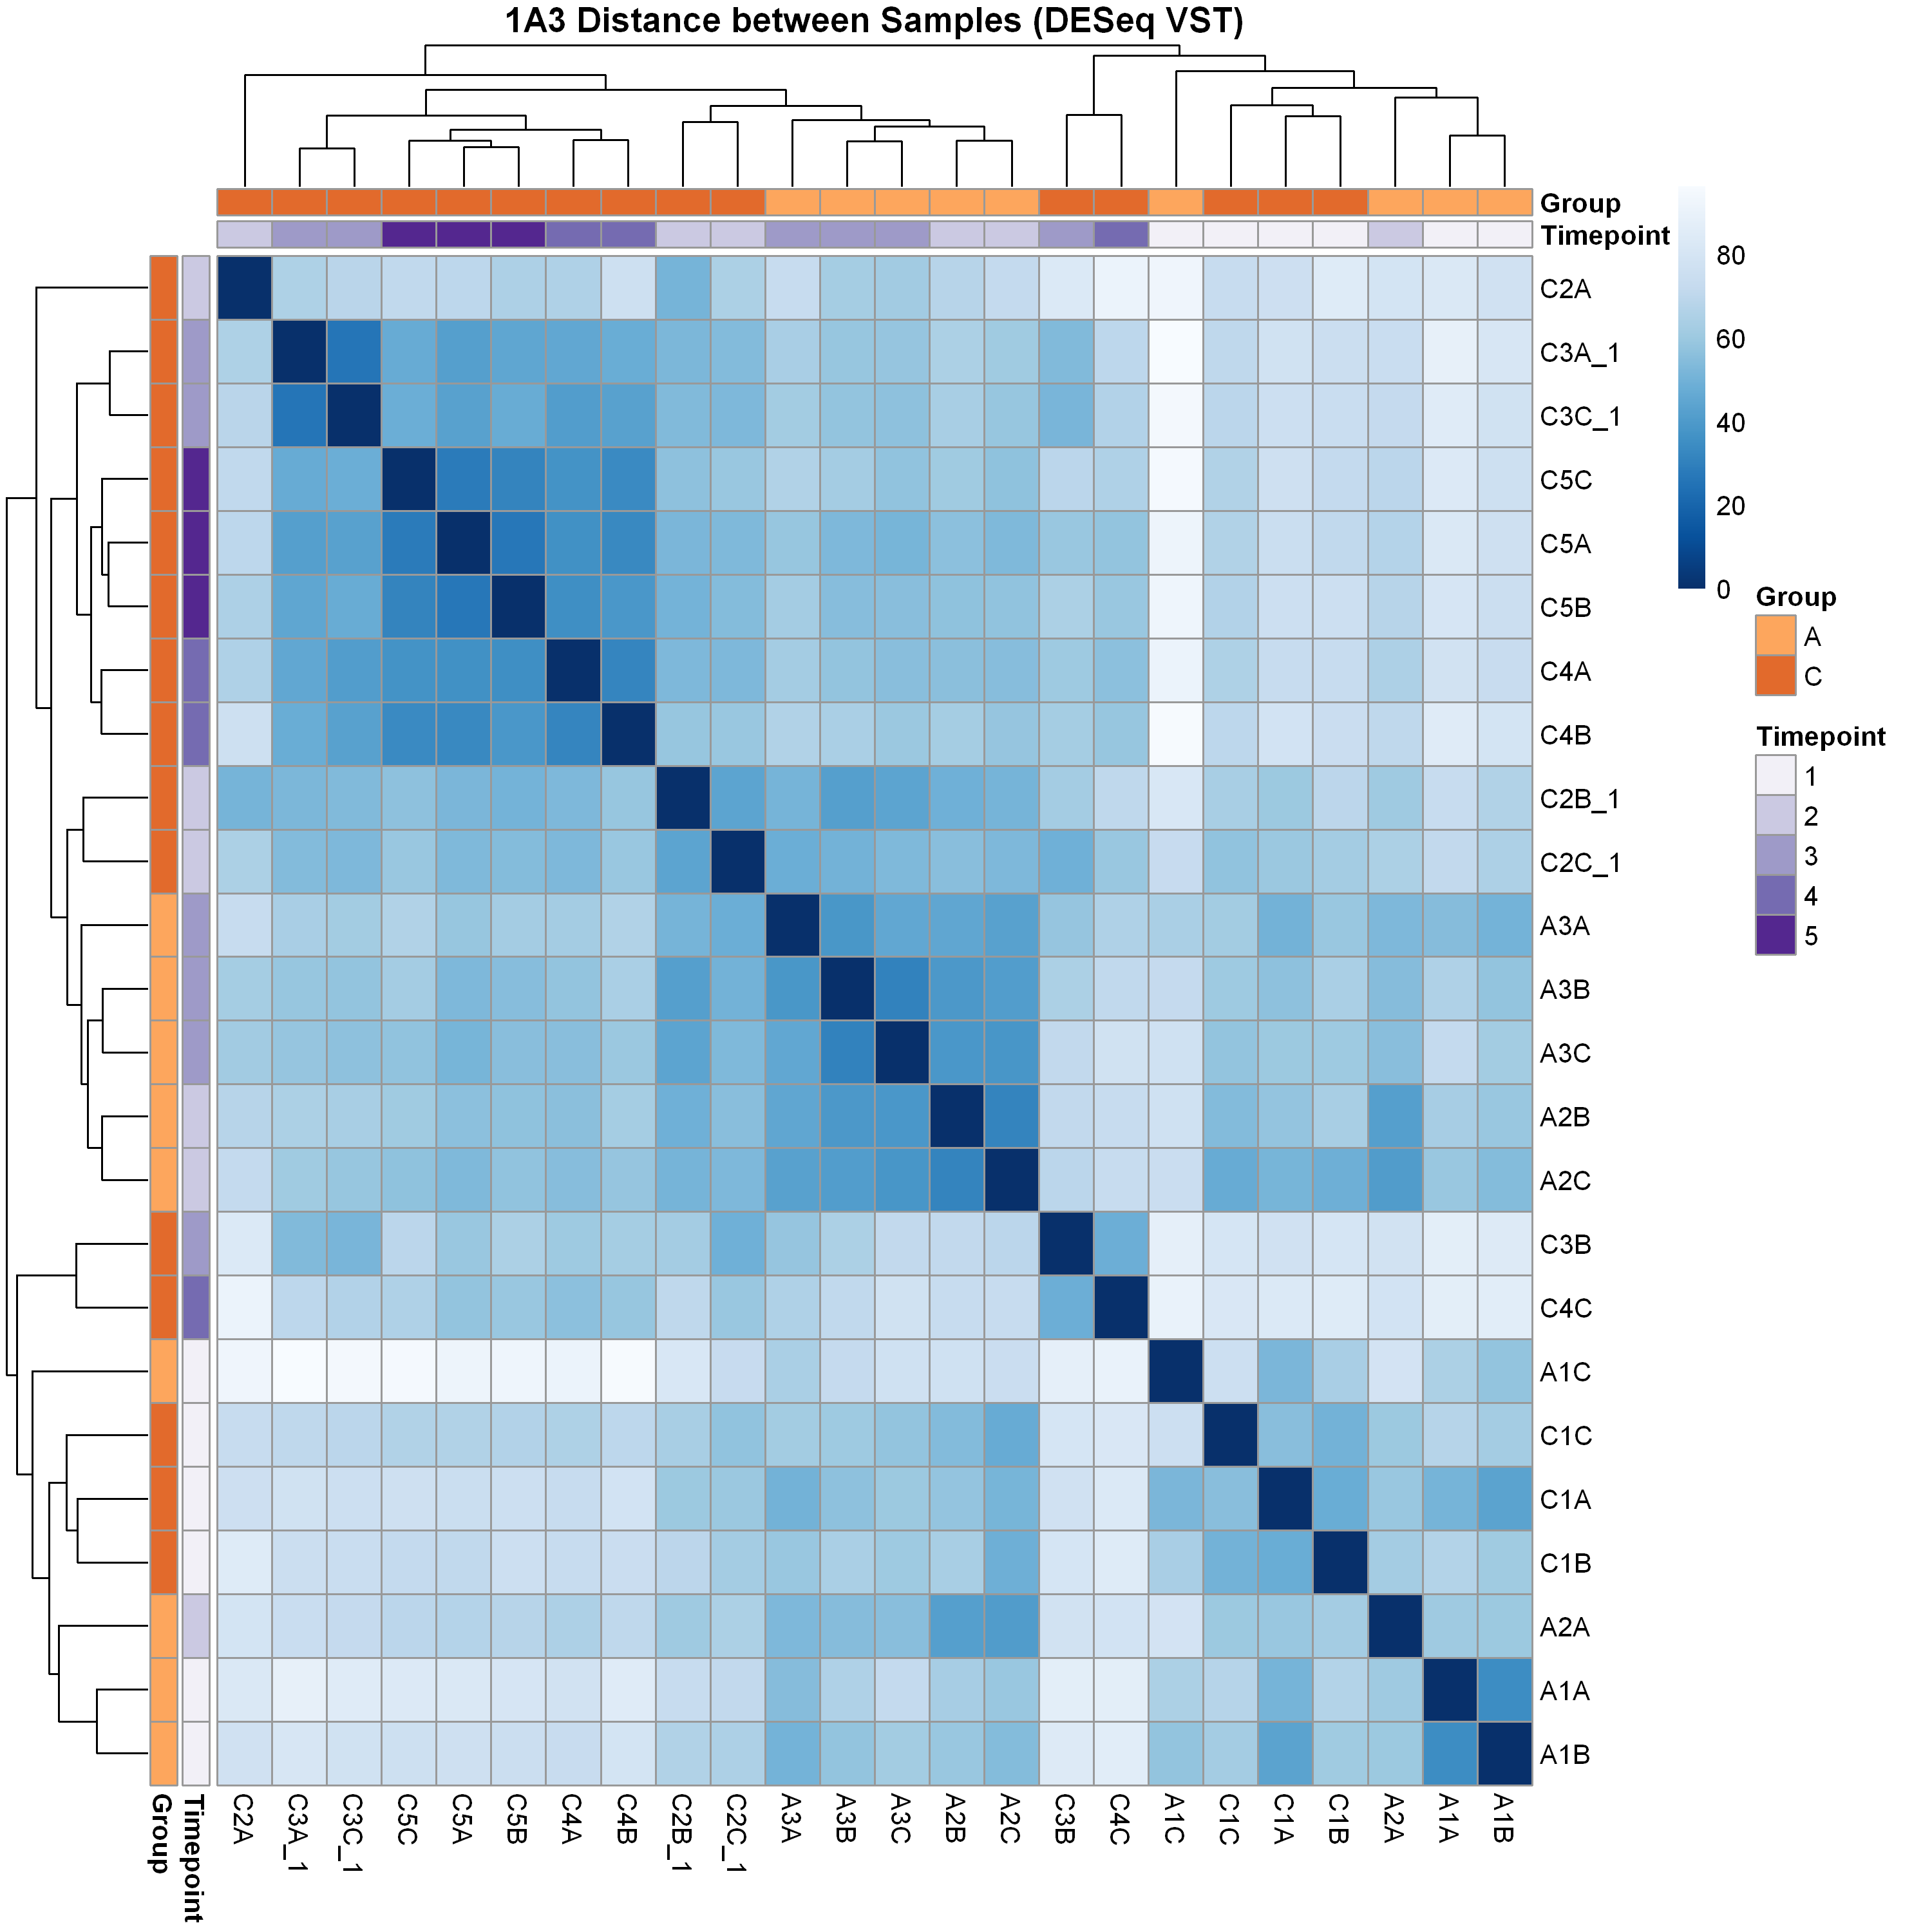

In [47]:
sampleDists <- dist(t(assay(vsd)))
#sampleDists
sampleDistMatrix <- as.matrix( sampleDists )
rownames(sampleDistMatrix) <- vsd$sample
colnames(sampleDistMatrix) <- vsd$sample
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
ann_df = colData(vsd)[c('Timepoint', 'Group')]

pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors,
         annotation_row = ann_df,
         annotation_col = ann_df,
         annotation_colors = ann_colors,
         main = "1A3 Distance between Samples (DESeq VST)"
)

In [48]:
head(sampleDistMatrix)

,A1A,A1B,A1C,A2A,A2B,A2C,A3A,A3B,A3C,C1A,⋯,C2C_1,C3A_1,C3B,C3C_1,C4A,C4B,C4C,C5A,C5B,C5C
A1A,0.00000,34.62979,64.53051,60.82582,63.06484,59.01825,54.68259,65.39211,71.63211,50.91699,⋯,71.42049,88.45946,86.72550,84.97507,78.04628,84.92967,86.77851,82.44914,80.45769,83.25193
A1B,34.62979,0.00000,57.53400,60.06018,59.13526,54.34660,50.52272,57.49804,61.85732,43.71099,⋯,64.70714,81.21578,84.28094,77.80047,73.43261,79.29706,85.94054,76.38967,74.85250,76.11652
A1C,64.53051,57.53400,0.00000,78.88631,77.00752,74.39471,64.22368,72.16385,77.05174,51.86120,⋯,72.79549,96.37932,87.96968,94.43232,90.38952,95.65571,89.65454,91.82363,92.21029,95.00663
A2A,60.82582,60.06018,78.88631,0.00000,41.86577,40.67526,52.81352,54.57231,55.47247,59.15307,⋯,64.48599,73.91684,78.05099,72.10790,64.98711,69.94999,78.57784,67.26925,67.89096,68.86132
A2B,63.06484,59.13526,77.00752,41.86577,0.00000,31.35698,45.08047,39.12020,38.60964,58.15500,⋯,55.26412,64.38770,71.18324,63.34155,55.68072,62.55890,73.28671,56.11997,56.73783,61.06642
A2C,59.01825,54.34660,74.39471,40.67526,31.35698,0.00000,42.83670,41.11163,37.96741,51.13986,⋯,52.83473,61.02660,69.12914,58.67888,55.07570,58.45883,73.04579,53.21065,57.16696,56.91537


In [49]:
m = as.data.frame(sampleDistMatrix)
m$sample1 = rownames(m)
mdist = pivot_longer(m, cols=colnames(sampleDistMatrix), 
            names_to='sample2',
            values_to='dist')
mdist = mdist %>% filter(sample1 != sample2)

In [50]:
mdist = left_join(mdist, colData(dds), 
          by=c('sample1' = 'sample'), suffix=c('', '_1'), copy=TRUE)
mdist = left_join(mdist, colData(dds), 
          by=c('sample2' = 'sample'), suffix=c('', '_2'), copy=TRUE)
head(mdist)


sample1,sample2,dist,sample_id,TGCnew.,Conc.Qubit.TGC..ng.ul.,init_RNA,Lib_conc..ng.ul.,Group,Timepoint,⋯,init_RNA_2,Lib_conc..ng.ul._2,Group_2,Timepoint_2,Replicate_2,Day_2,extraction_2,techincal_replicate_2,phase_2,groupandtime_2
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,⋯,<dbl>,<dbl>,<fct>,<fct>,<chr>,<chr>,<fct>,<dbl>,<fct>,<fct>
A1A,A1B,34.62979,A1A_S7,7,168,100,0.888,A,1,⋯,100,0.850,A,1,B,11,1,0,logExp,A1
A1A,A1C,64.53051,A1A_S7,7,168,100,0.888,A,1,⋯,100,1.570,A,1,C,11,1,0,logExp,A1
A1A,A2A,60.82582,A1A_S7,7,168,100,0.888,A,1,⋯,100,0.592,A,2,A,18,2,0,decline,A2
A1A,A2B,63.06484,A1A_S7,7,168,100,0.888,A,1,⋯,100,0.570,A,2,B,18,2,0,decline,A2
A1A,A2C,59.01825,A1A_S7,7,168,100,0.888,A,1,⋯,100,0.980,A,2,C,18,4,0,decline,A2
A1A,A3A,54.68259,A1A_S7,7,168,100,0.888,A,1,⋯,100,1.100,A,3,A,31,4,0,long-term,A3


In [51]:
dput(colnames(mdist))

c("sample1", "sample2", "dist", "sample_id", "TGCnew.", "Conc.Qubit.TGC..ng.ul.", 
"init_RNA", "Lib_conc..ng.ul.", "Group", "Timepoint", "Replicate", 
"Day", "extraction", "techincal_replicate", "phase", "groupandtime", 
"sample_id_2", "TGCnew._2", "Conc.Qubit.TGC..ng.ul._2", "init_RNA_2", 
"Lib_conc..ng.ul._2", "Group_2", "Timepoint_2", "Replicate_2", 
"Day_2", "extraction_2", "techincal_replicate_2", "phase_2", 
"groupandtime_2")


In [52]:
cgroup_levels = c("AA",  "CA", "CC")
cgroup_levels = c("Distance from A to A",  "Distance from C to A", 
                  "Distance from C to C")
ctime_levels = c(
    "11", 
    "21", '22', 
    '31', '32', "33", 
    '41', '42', "43", "44", 
    '51', '52', "53", "54", "55"
)
cself= c('11', '22', '33','44', '55')
mdist = mdist %>% 
   mutate(combgroup = paste('Distance from', Group, 'to', Group_2),
          combtime = paste0(Timepoint, Timepoint_2),
          self = combtime %in% cself
         ) %>%
   rename(Distance_to_timepoint = Timepoint_2 ) %>%
   filter(combgroup %in% cgroup_levels, combtime %in% ctime_levels)
  
dput(unique(mdist$combgroup))
dput(unique(mdist$combtime))

c("Distance from A to A", "Distance from C to A", "Distance from C to C"
)
c("11", "21", "22", "31", "32", "33", "41", "42", "43", "44", 
"51", "52", "53", "54", "55")


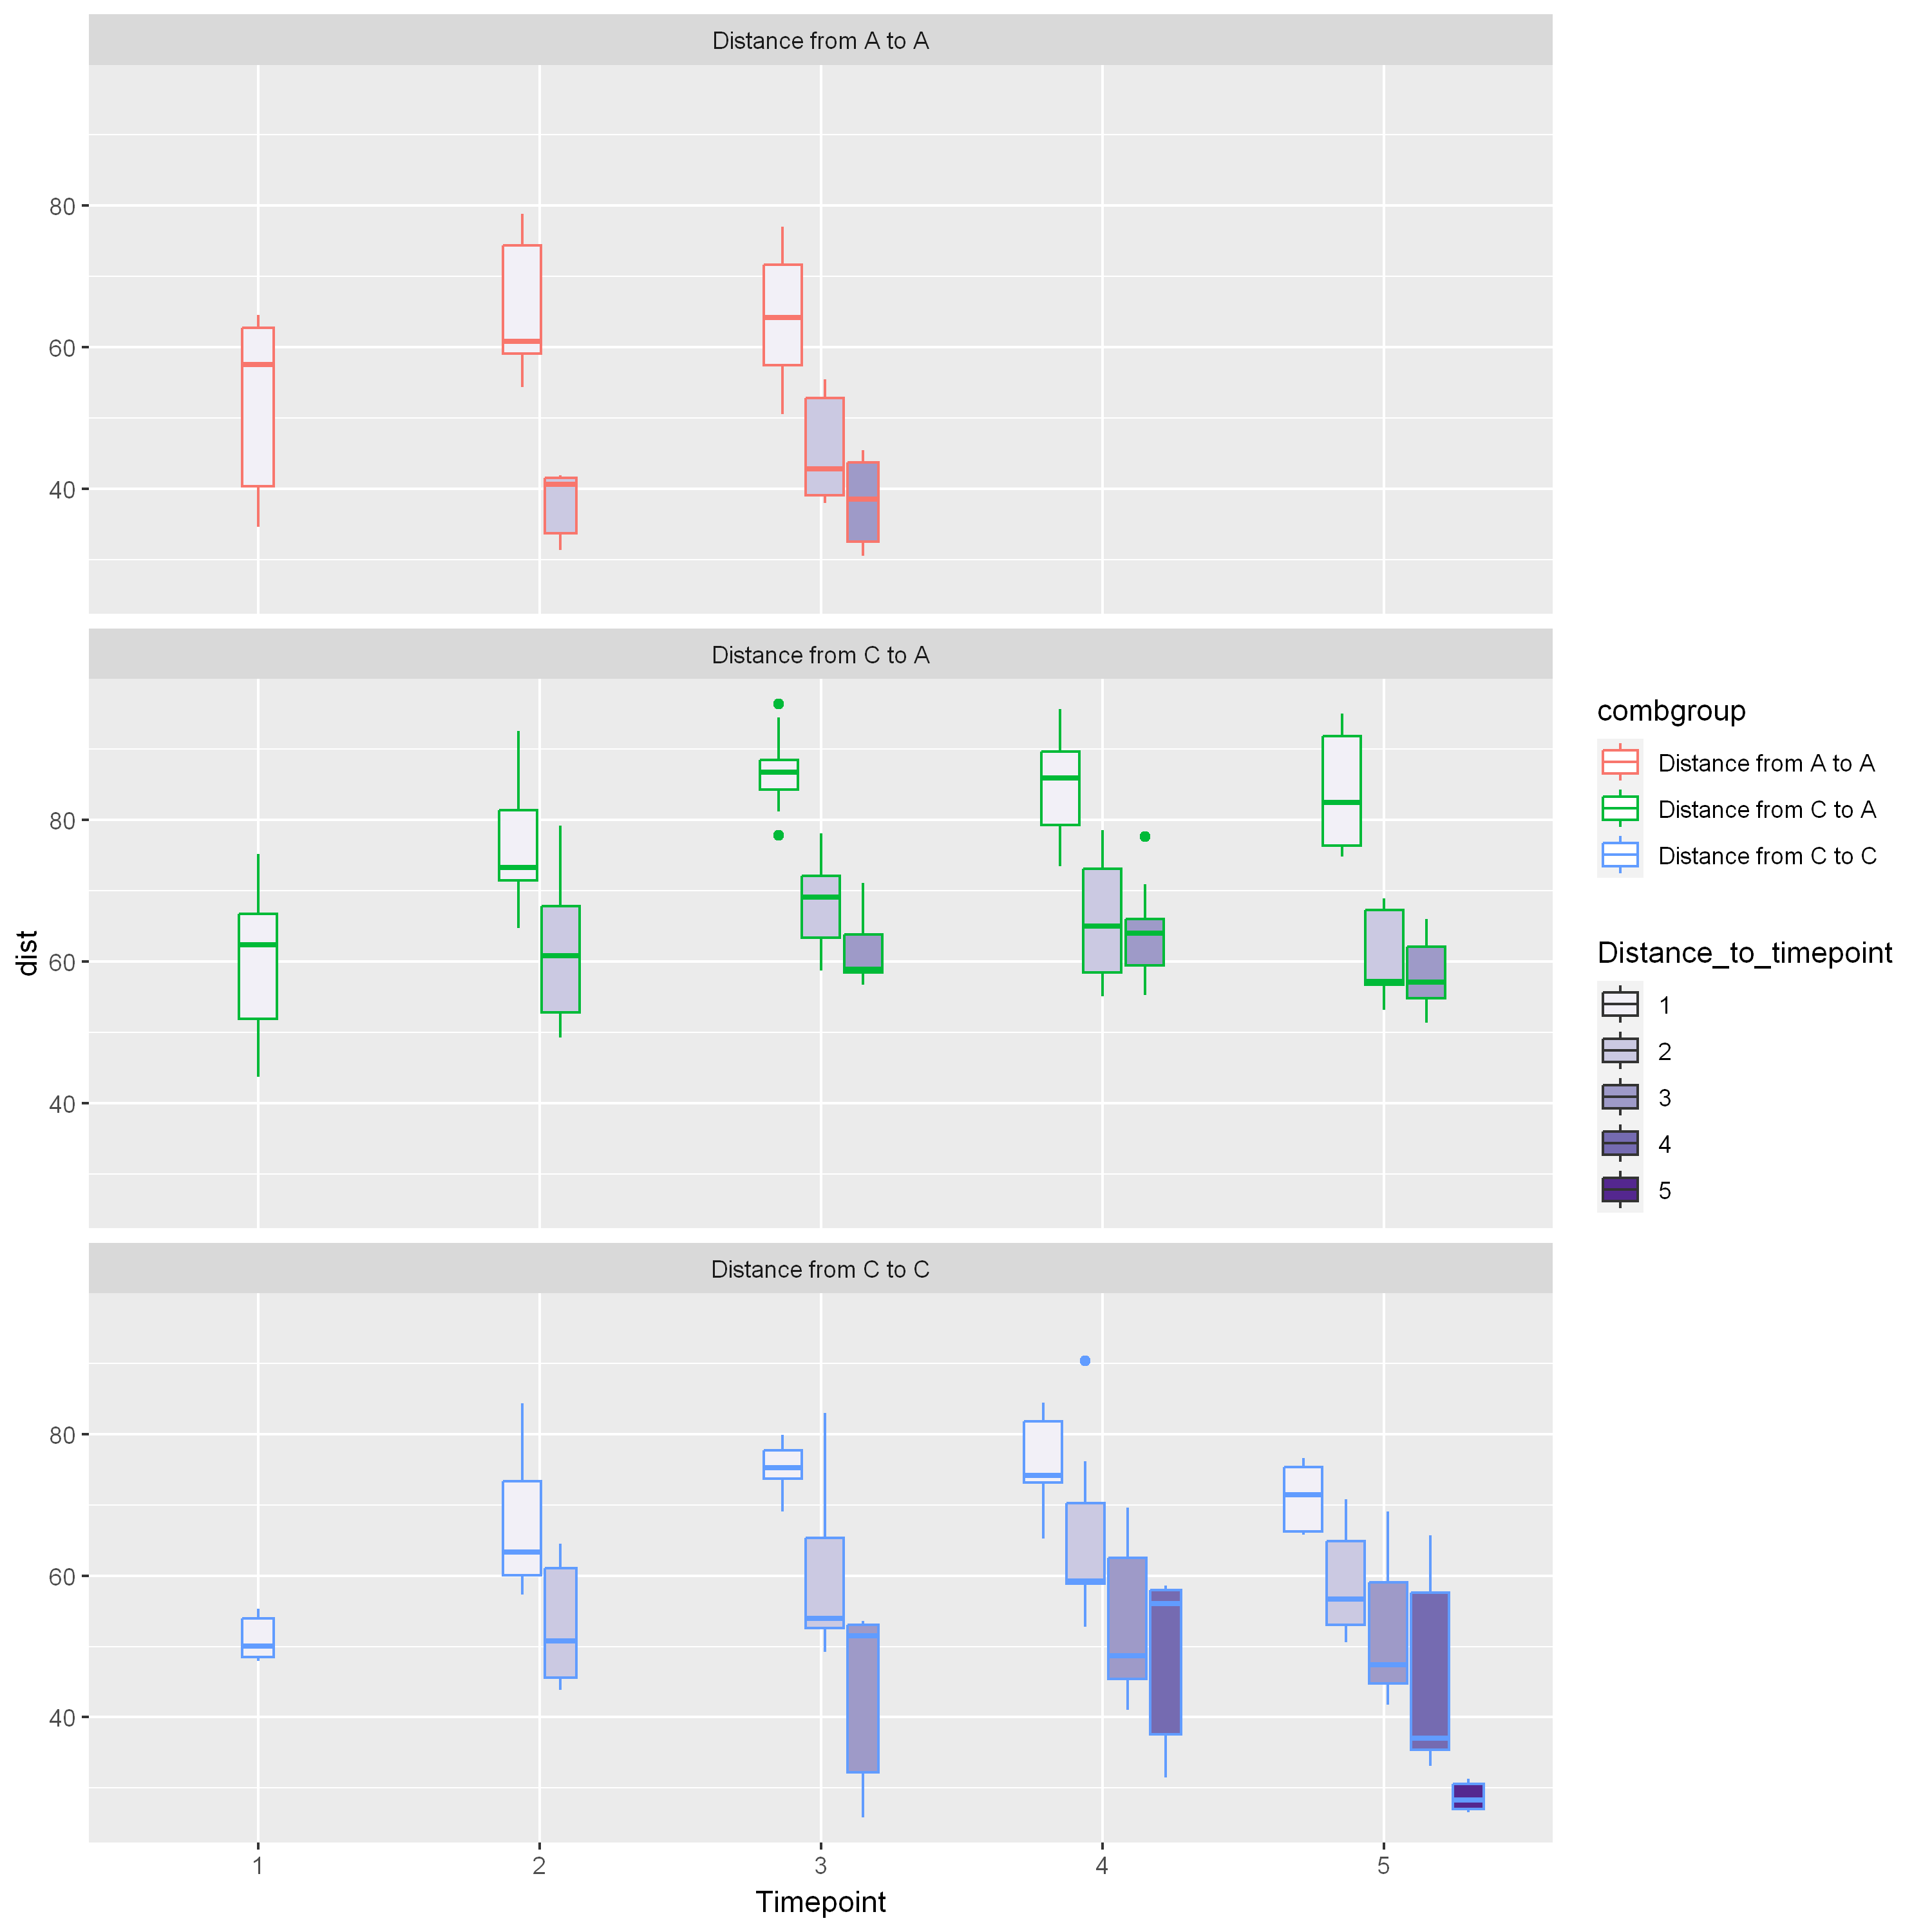

In [53]:
ggplot(mdist, aes(x=Timepoint, y=dist, fill=Distance_to_timepoint, 
                  color=combgroup)) +
   #geom_point() +
   #geom_line(aes(group=Timepoint_2))
   geom_boxplot(varwidth = TRUE) +
   scale_fill_manual(values = ann_colors$Timepoint) +
   facet_wrap(~combgroup, ncol=1)

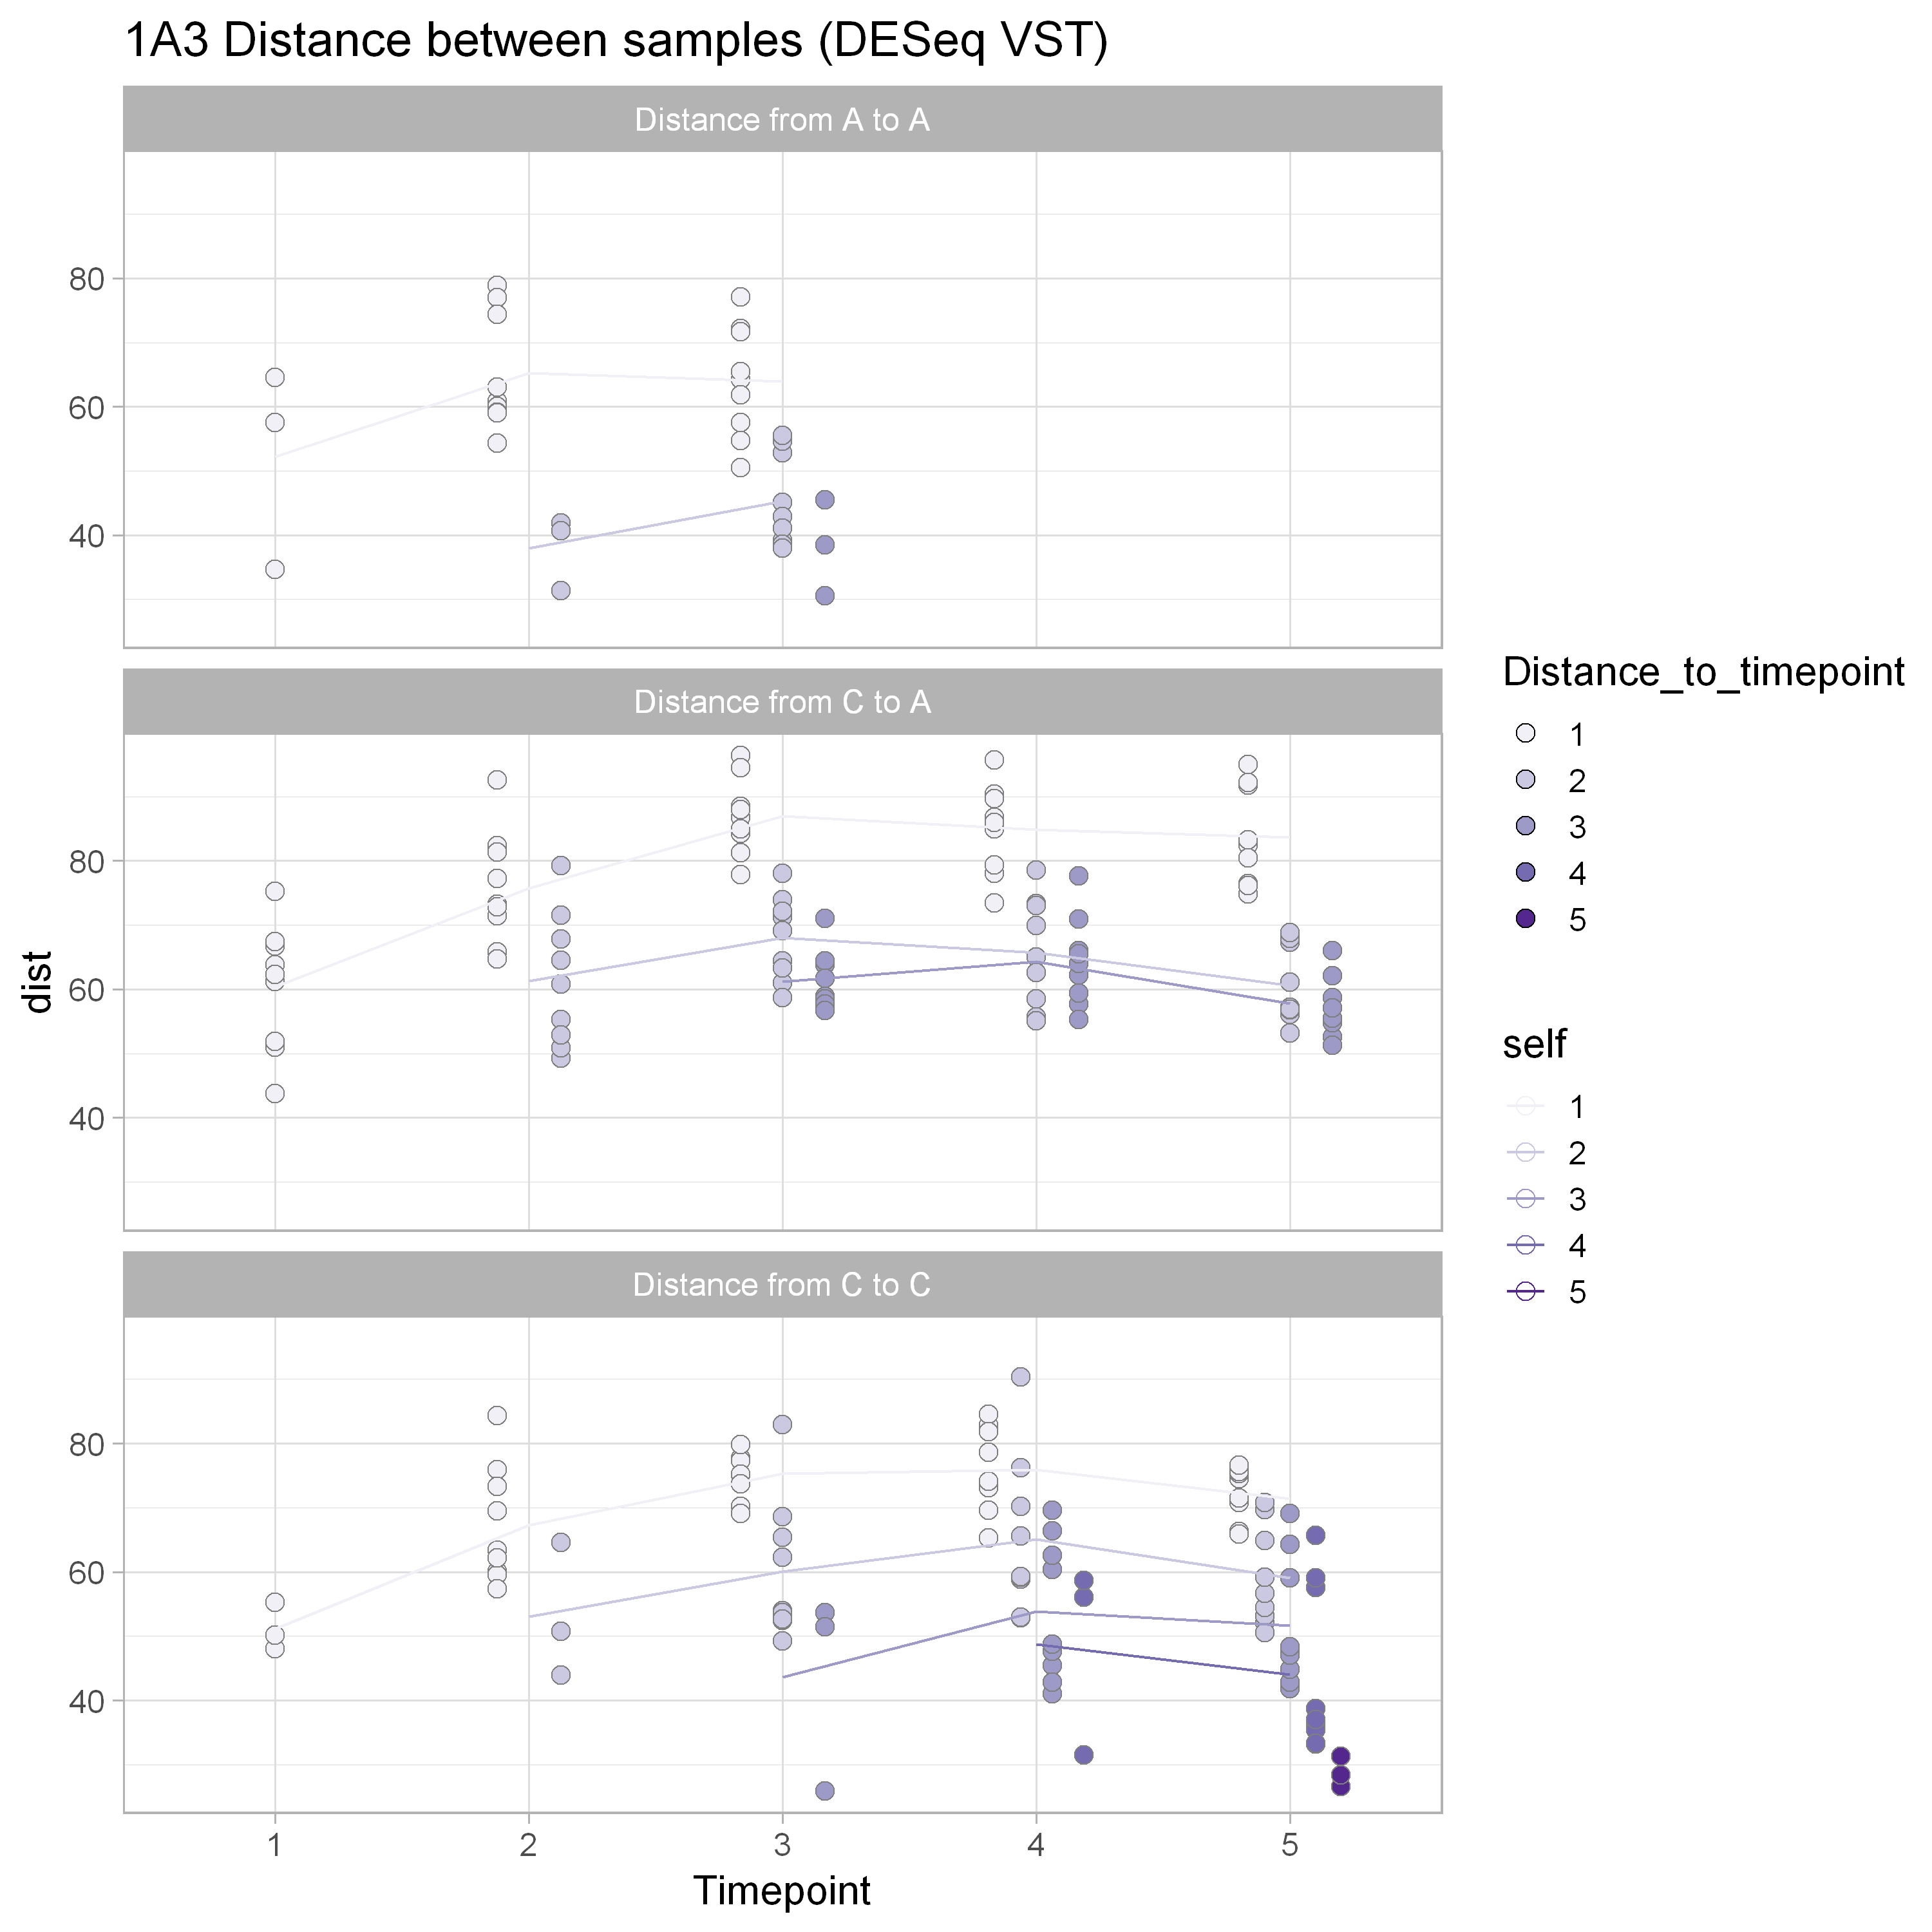

In [54]:
ggplot(mdist, aes(x=Timepoint, y=dist, fill=Distance_to_timepoint, 
                  color=self,
                  group=Distance_to_timepoint)) +
   geom_point(shape = 21, stroke = 0.5,
       position=position_dodge(width=0.5), #color='grey',
             size=3) +
   stat_summary(aes(color=Distance_to_timepoint), fun=mean, geom="line") +
   #geom_line(aes(group=Timepoint_2))
   #geom_boxplot(varwidth = TRUE) +
   scale_fill_manual(values = ann_colors$Timepoint) +
   scale_color_manual(values = ann_colors$Timepoint) +
   facet_wrap(~combgroup, ncol=1) +
  ggtitle("1A3 Distance between samples (DESeq VST)") +
  theme_light(base_size = 15)


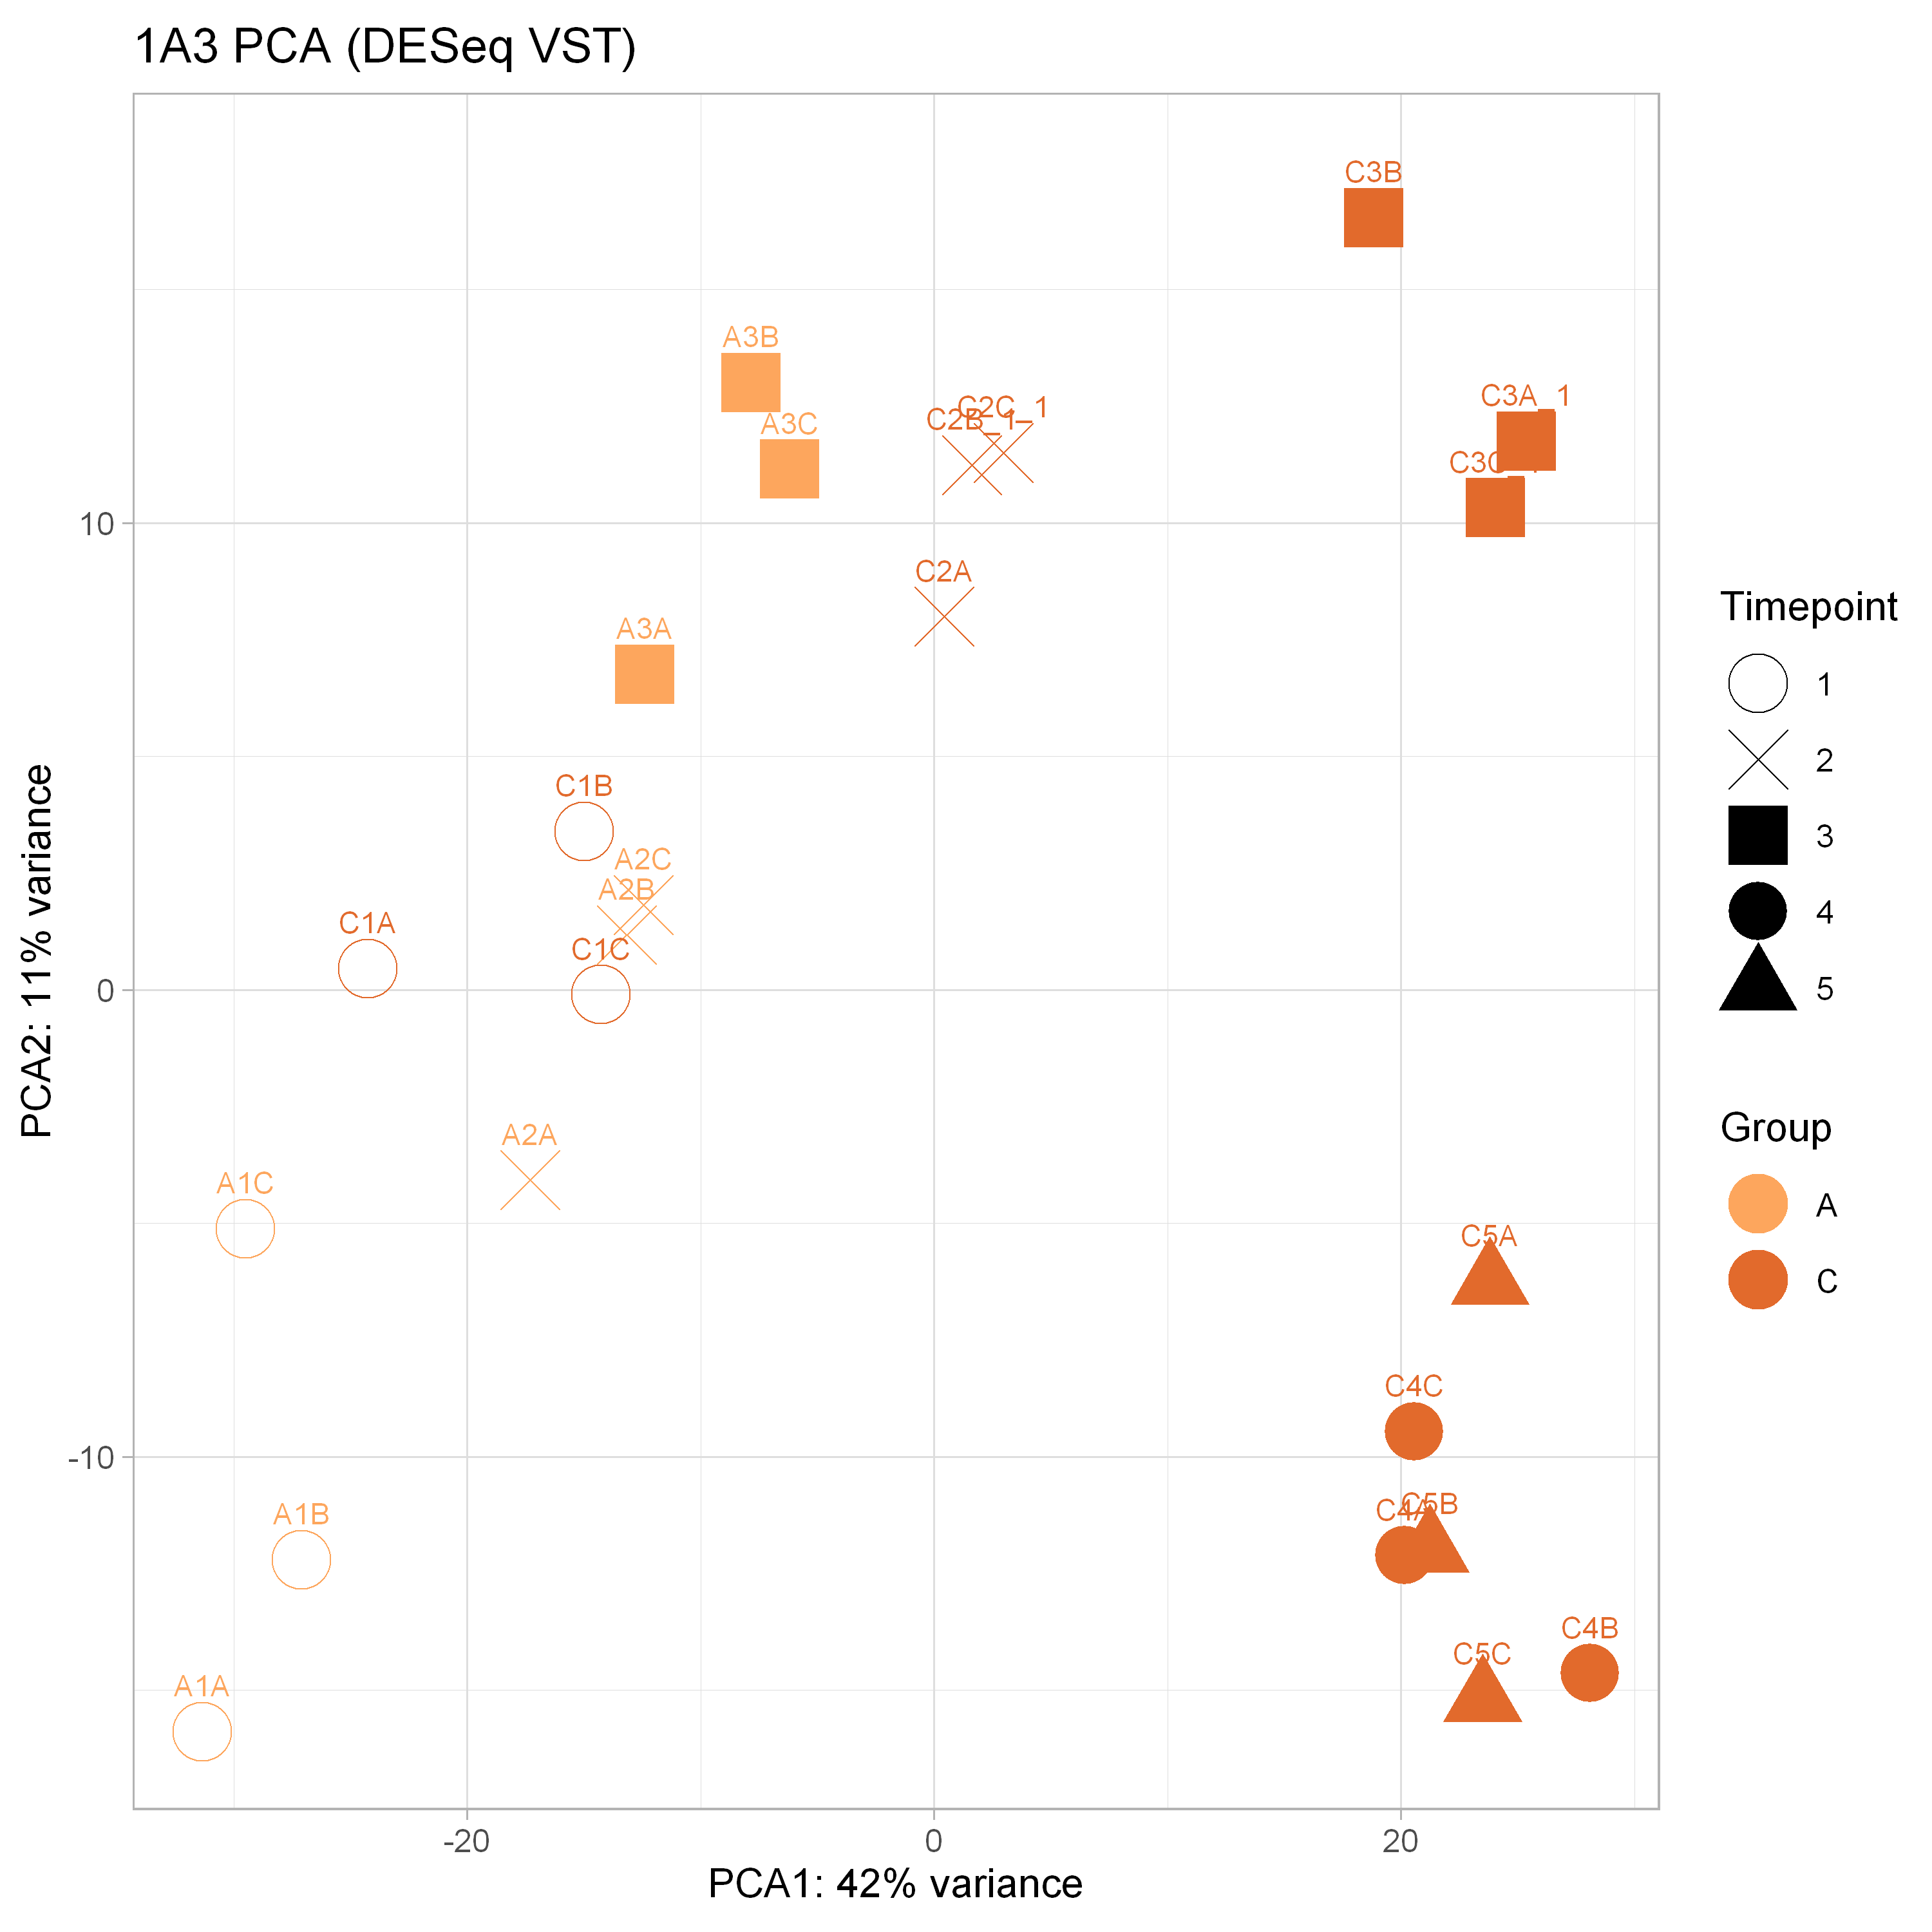

In [55]:
pcaData <- plotPCA(vsd, intgroup = c( "Timepoint", "Group", 'sample'), 
                   returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))

ggplot(pcaData, aes(x = PC1, y = PC2, 
                    color = Group, shape = Timepoint, label=sample)) +
  geom_point(size =10) +
  xlab(paste0("PCA1: ", percentVar[1], "% variance")) +
  ylab(paste0("PCA2: ", percentVar[2], "% variance")) +
  coord_fixed(ratio=2) +
  geom_text(nudge_y = 1) +
  scale_color_manual(values = ann_colors$Group) +
  scale_shape_manual(values=c(1, 4, 15, 16, 17))+
  ggtitle("1A3 PCA (DESeq VST)") +
  theme_light(base_size = 15)



In [56]:
alpha=0.01

In [57]:
dds <- DESeq(dds)
res <- results(dds, alpha=alpha)
res

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): groupandtime C5 vs A1 
Wald test p-value: groupandtime C5 vs A1 
DataFrame with 4015 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat    pvalue      padj
              <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
ACZ81_RS00005  4661.896      0.3838636  0.319227  1.202477  0.229179  0.333987
ACZ81_RS00010  2059.391     -0.1435877  0.259351 -0.553643  0.579823  0.686615
ACZ81_RS00015   557.127     -0.0684552  0.331506 -0.206498  0.836402  0.891511
ACZ81_RS00020  3109.652      0.1259842  0.339843  0.370713  0.710851  0.793644
ACZ81_RS00025   160.545      0.2417205  0.261048  0.925961  0.354466  0.472779
...                 ...            ...       ...       ...       ...       ...
ACZ81_RS21670  293.8270     -0.0813884  0.304841 -0.266987  0.789479  0.855915
ACZ81_RS21675 5019.9987      0.9304141  0.688817  1.350742  0.176778  0.273224
ACZ81_RS21680 2705.7262      0.7185243  0.670955  1.070898  0.284215  0.395806
ACZ

In [58]:
s = summary(res)
s


out of 4015 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 462, 12%
LFC < 0 (down)     : 755, 19%
outliers [1]       : 3, 0.075%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



NULL

In [82]:
sum_dds <- function(name) {
    res = results(dds, contrast=name)
    sum = table(as.data.frame(res) %>% mutate(
           contrast = paste0(name[2],'vs', name[3]),
        na_pvalue = is.na(pvalue),
               na_padj = is.na(padj),
               significant = padj < 0.1,
               direction = if_else(log2FoldChange > 0, 'up', 'down'),
               status = if_else(na_pvalue, 'outlier',
                                if_else(na_padj, 'lowcount', 
                                        if_else(significant, direction, 'no_significant'
                                        
                               )))
               ) %>% select(status))
    #sum = cbind(sum, name=name)
    return(sum)
    }


In [83]:
get_dds <- function(name) {
    res = results(dds, contrast=name)
    res = as.data.frame(res) %>% 
       mutate(
           contrast = paste0(name[2],'vs', name[3]),
           na_pvalue = is.na(pvalue),
           na_padj = is.na(padj),
           significant = padj < 0.1,
           direction = if_else(log2FoldChange > 0, 'up', 'down'),
           status = if_else(na_pvalue, 'outlier',
                            if_else(na_padj, 'lowcount', 
                                    if_else(significant, direction, 'no_significant'
                                           )))
       ) 
    return(res)
}


In [84]:
results_names = resultsNames(dds)


contrasts_to_check = list (
    c('groupandtime','A2','A1'), 
    c('groupandtime','A3','A1'), 
    c('groupandtime','C1','A1'),
    c('groupandtime','C2','C1'), 
    c('groupandtime','C3','C1'), 
    c('groupandtime','C4','C1'), 
    c('groupandtime','C5','C1')
)
contrasts_to_check

[[1]]
[1] "groupandtime" "A2"           "A1"          

[[2]]
[1] "groupandtime" "A3"           "A1"          

[[3]]
[1] "groupandtime" "C1"           "A1"          

[[4]]
[1] "groupandtime" "C2"           "C1"          

[[5]]
[1] "groupandtime" "C3"           "C1"          

[[6]]
[1] "groupandtime" "C4"           "C1"          

[[7]]
[1] "groupandtime" "C5"           "C1"

In [85]:
#bind_rows(
sum_df = lapply(contrasts_to_check, sum_dds) %>% bind_rows 
sum_df$name= contrasts_to_check
sum_df


down,no_significant,outlier,up,lowcount,name
<table[1d]>,<table[1d]>,<table[1d]>,<table[1d]>,<table[1d]>,<list>
761,2829,3,422,NA,groupand....
628,3023,3,361,NA,groupand....
261,3496,3,177,78,groupand....
571,2860,3,581,NA,groupand....
746,2589,3,677,NA,groupand....
786,2538,3,688,NA,groupand....
849,2523,3,640,NA,groupand....


In [88]:
res_df = lapply(contrasts_to_check, get_dds) %>% 
  bind_rows %>%
  rownames_to_column(var = 'gene_id') 

write_csv(res_df, file.path('DE_results','HOt1A3_DE_DESEQ_results.csv'))


In [89]:
write.csv(as.data.frame(assay(vsd)), file.path('DE_results','HOT1A3_DE_DESEQ_vsd.csv'))


In [67]:
dds@design

~groupandtime

In [68]:
summary(results(dds, name='groupandtime_C1_vs_A1'
        ))


out of 4015 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 177, 4.4%
LFC < 0 (down)     : 261, 6.5%
outliers [1]       : 3, 0.075%
low counts [2]     : 78, 1.9%
(mean count < 14)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [69]:
resLFC <- lfcShrink(dds, coef="groupandtime_C1_vs_A1", type="apeglm")
resLFC

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



log2 fold change (MAP): groupandtime C1 vs A1 
Wald test p-value: groupandtime C1 vs A1 
DataFrame with 4015 rows and 5 columns
               baseMean log2FoldChange     lfcSE    pvalue      padj
              <numeric>      <numeric> <numeric> <numeric> <numeric>
ACZ81_RS00005  4661.896      0.5697647  0.336832 0.0127281  0.107682
ACZ81_RS00010  2059.391      0.1793241  0.217665 0.2771314  0.589580
ACZ81_RS00015   557.127      0.0723731  0.233016 0.6512690  0.855217
ACZ81_RS00020  3109.652      0.4691177  0.347618 0.0310521  0.187660
ACZ81_RS00025   160.545      0.2176901  0.233266 0.1959675  0.498370
...                 ...            ...       ...       ...       ...
ACZ81_RS21670  293.8270      0.0879929  0.226042  0.606796  0.832142
ACZ81_RS21675 5019.9987      0.1284285  0.316386  0.296818  0.607852
ACZ81_RS21680 2705.7262      0.1329197  0.316799  0.299950  0.610767
ACZ81_RS21685   79.6218     -0.2091524  0.255210  0.223999  0.533562
ACZ81_RS21705   41.4788     -0.1089368  0.28

In [70]:
resOrdered <- res[order(res$pvalue),]

In [71]:
summary(resLFC)


out of 4015 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 177, 4.4%
LFC < 0 (down)     : 261, 6.5%
outliers [1]       : 3, 0.075%
low counts [2]     : 78, 1.9%
(mean count < 14)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [72]:
summary(res)


out of 4015 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 462, 12%
LFC < 0 (down)     : 755, 19%
outliers [1]       : 3, 0.075%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [73]:
sum(res$padj < 0.1, na.rm=TRUE)

[1] 1988

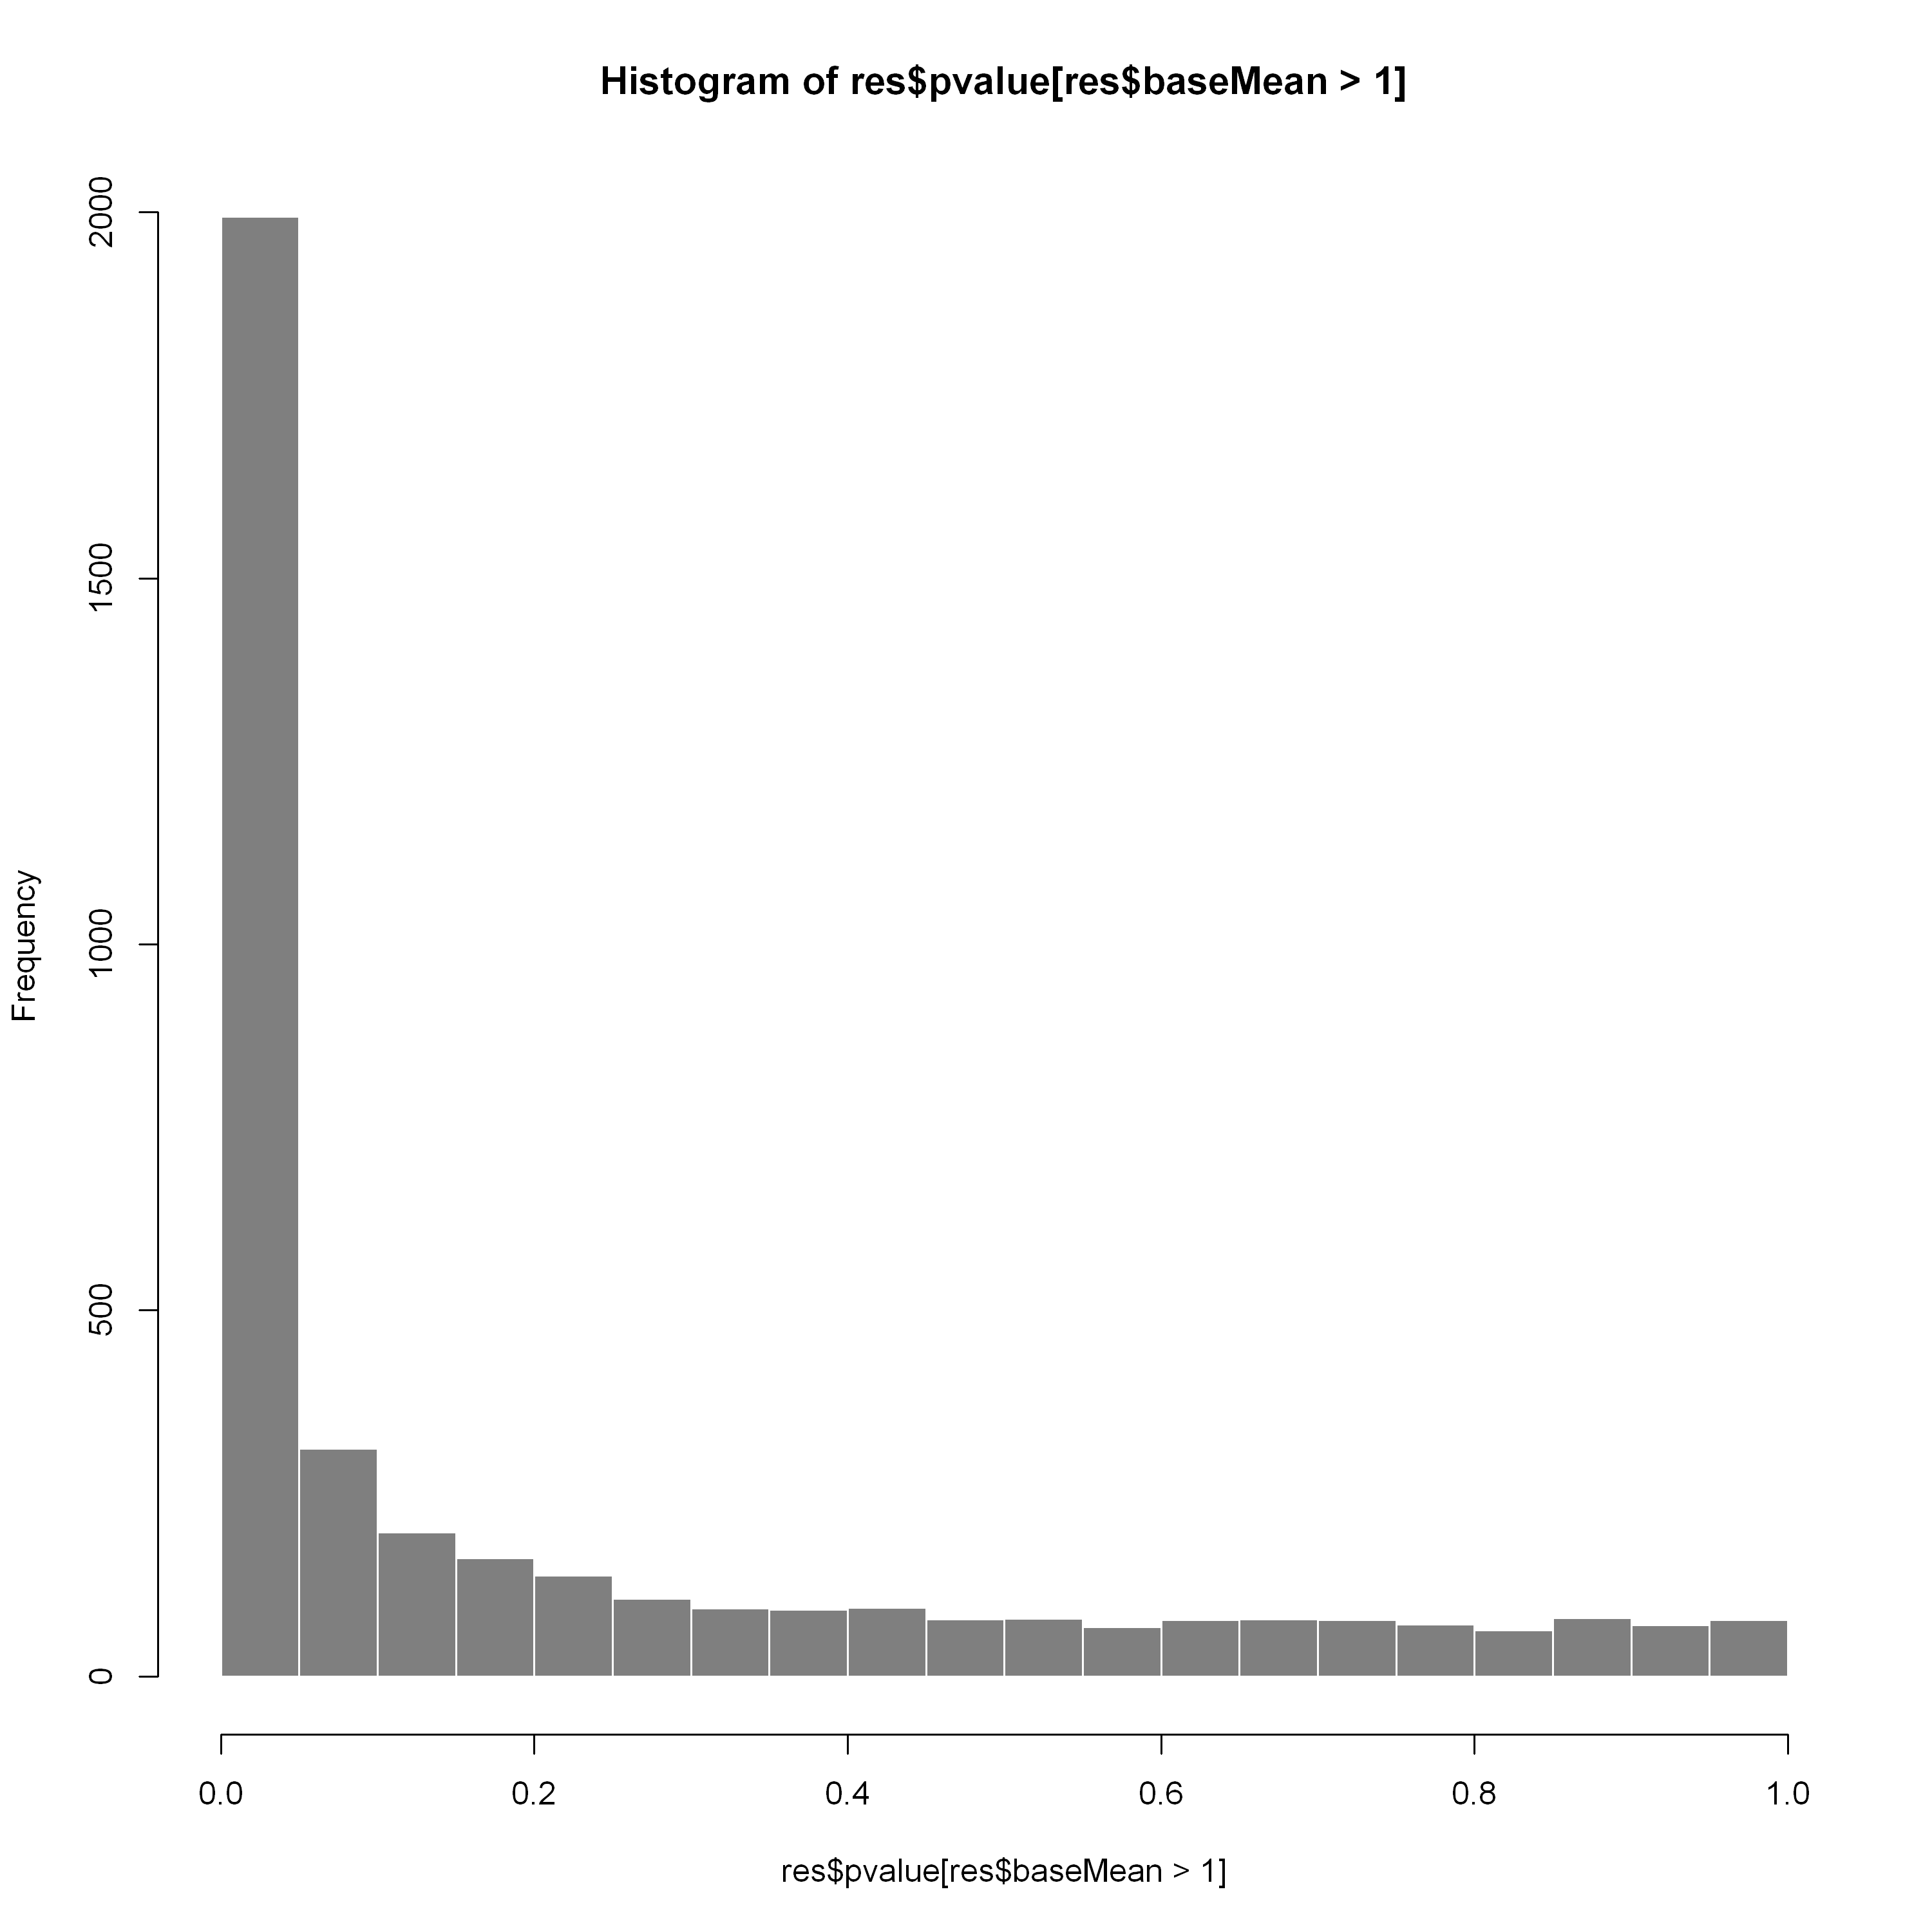

In [74]:
hist(res$pvalue[res$baseMean > 1], breaks = 0:20/20,
     col = "grey50", border = "white")

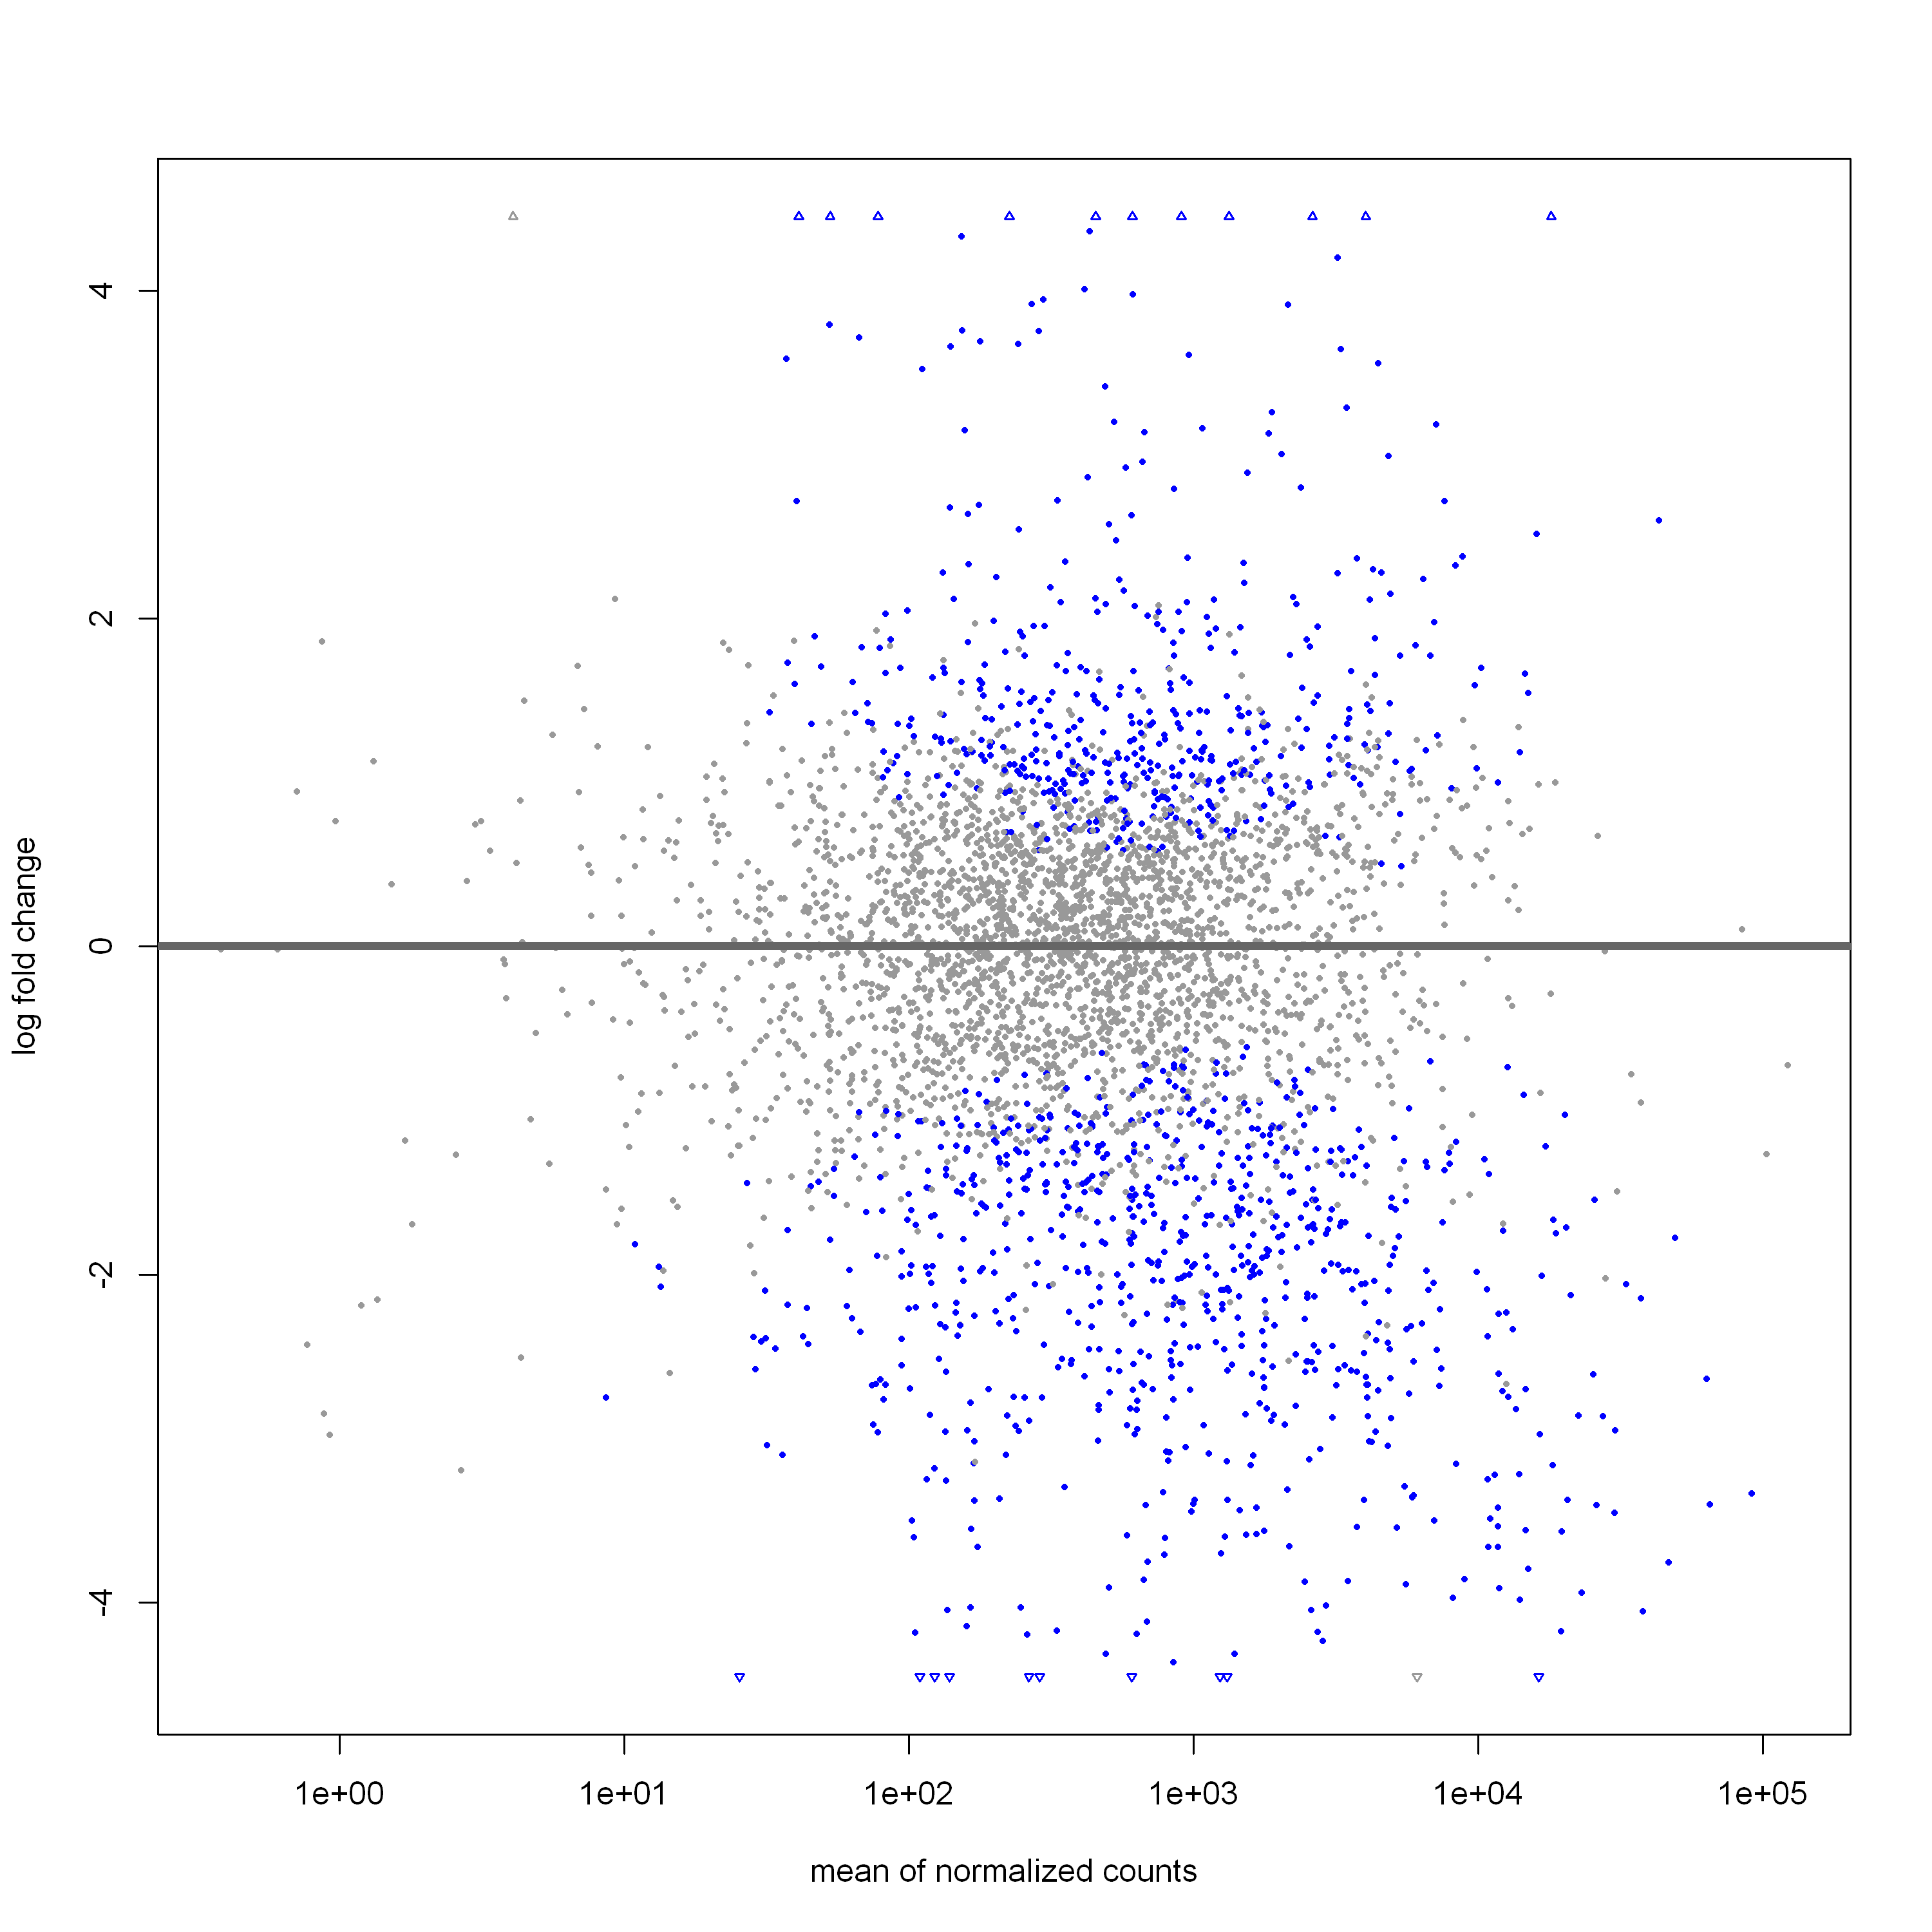

In [75]:
plotMA(res, #ylim=c(-2,2)
      )

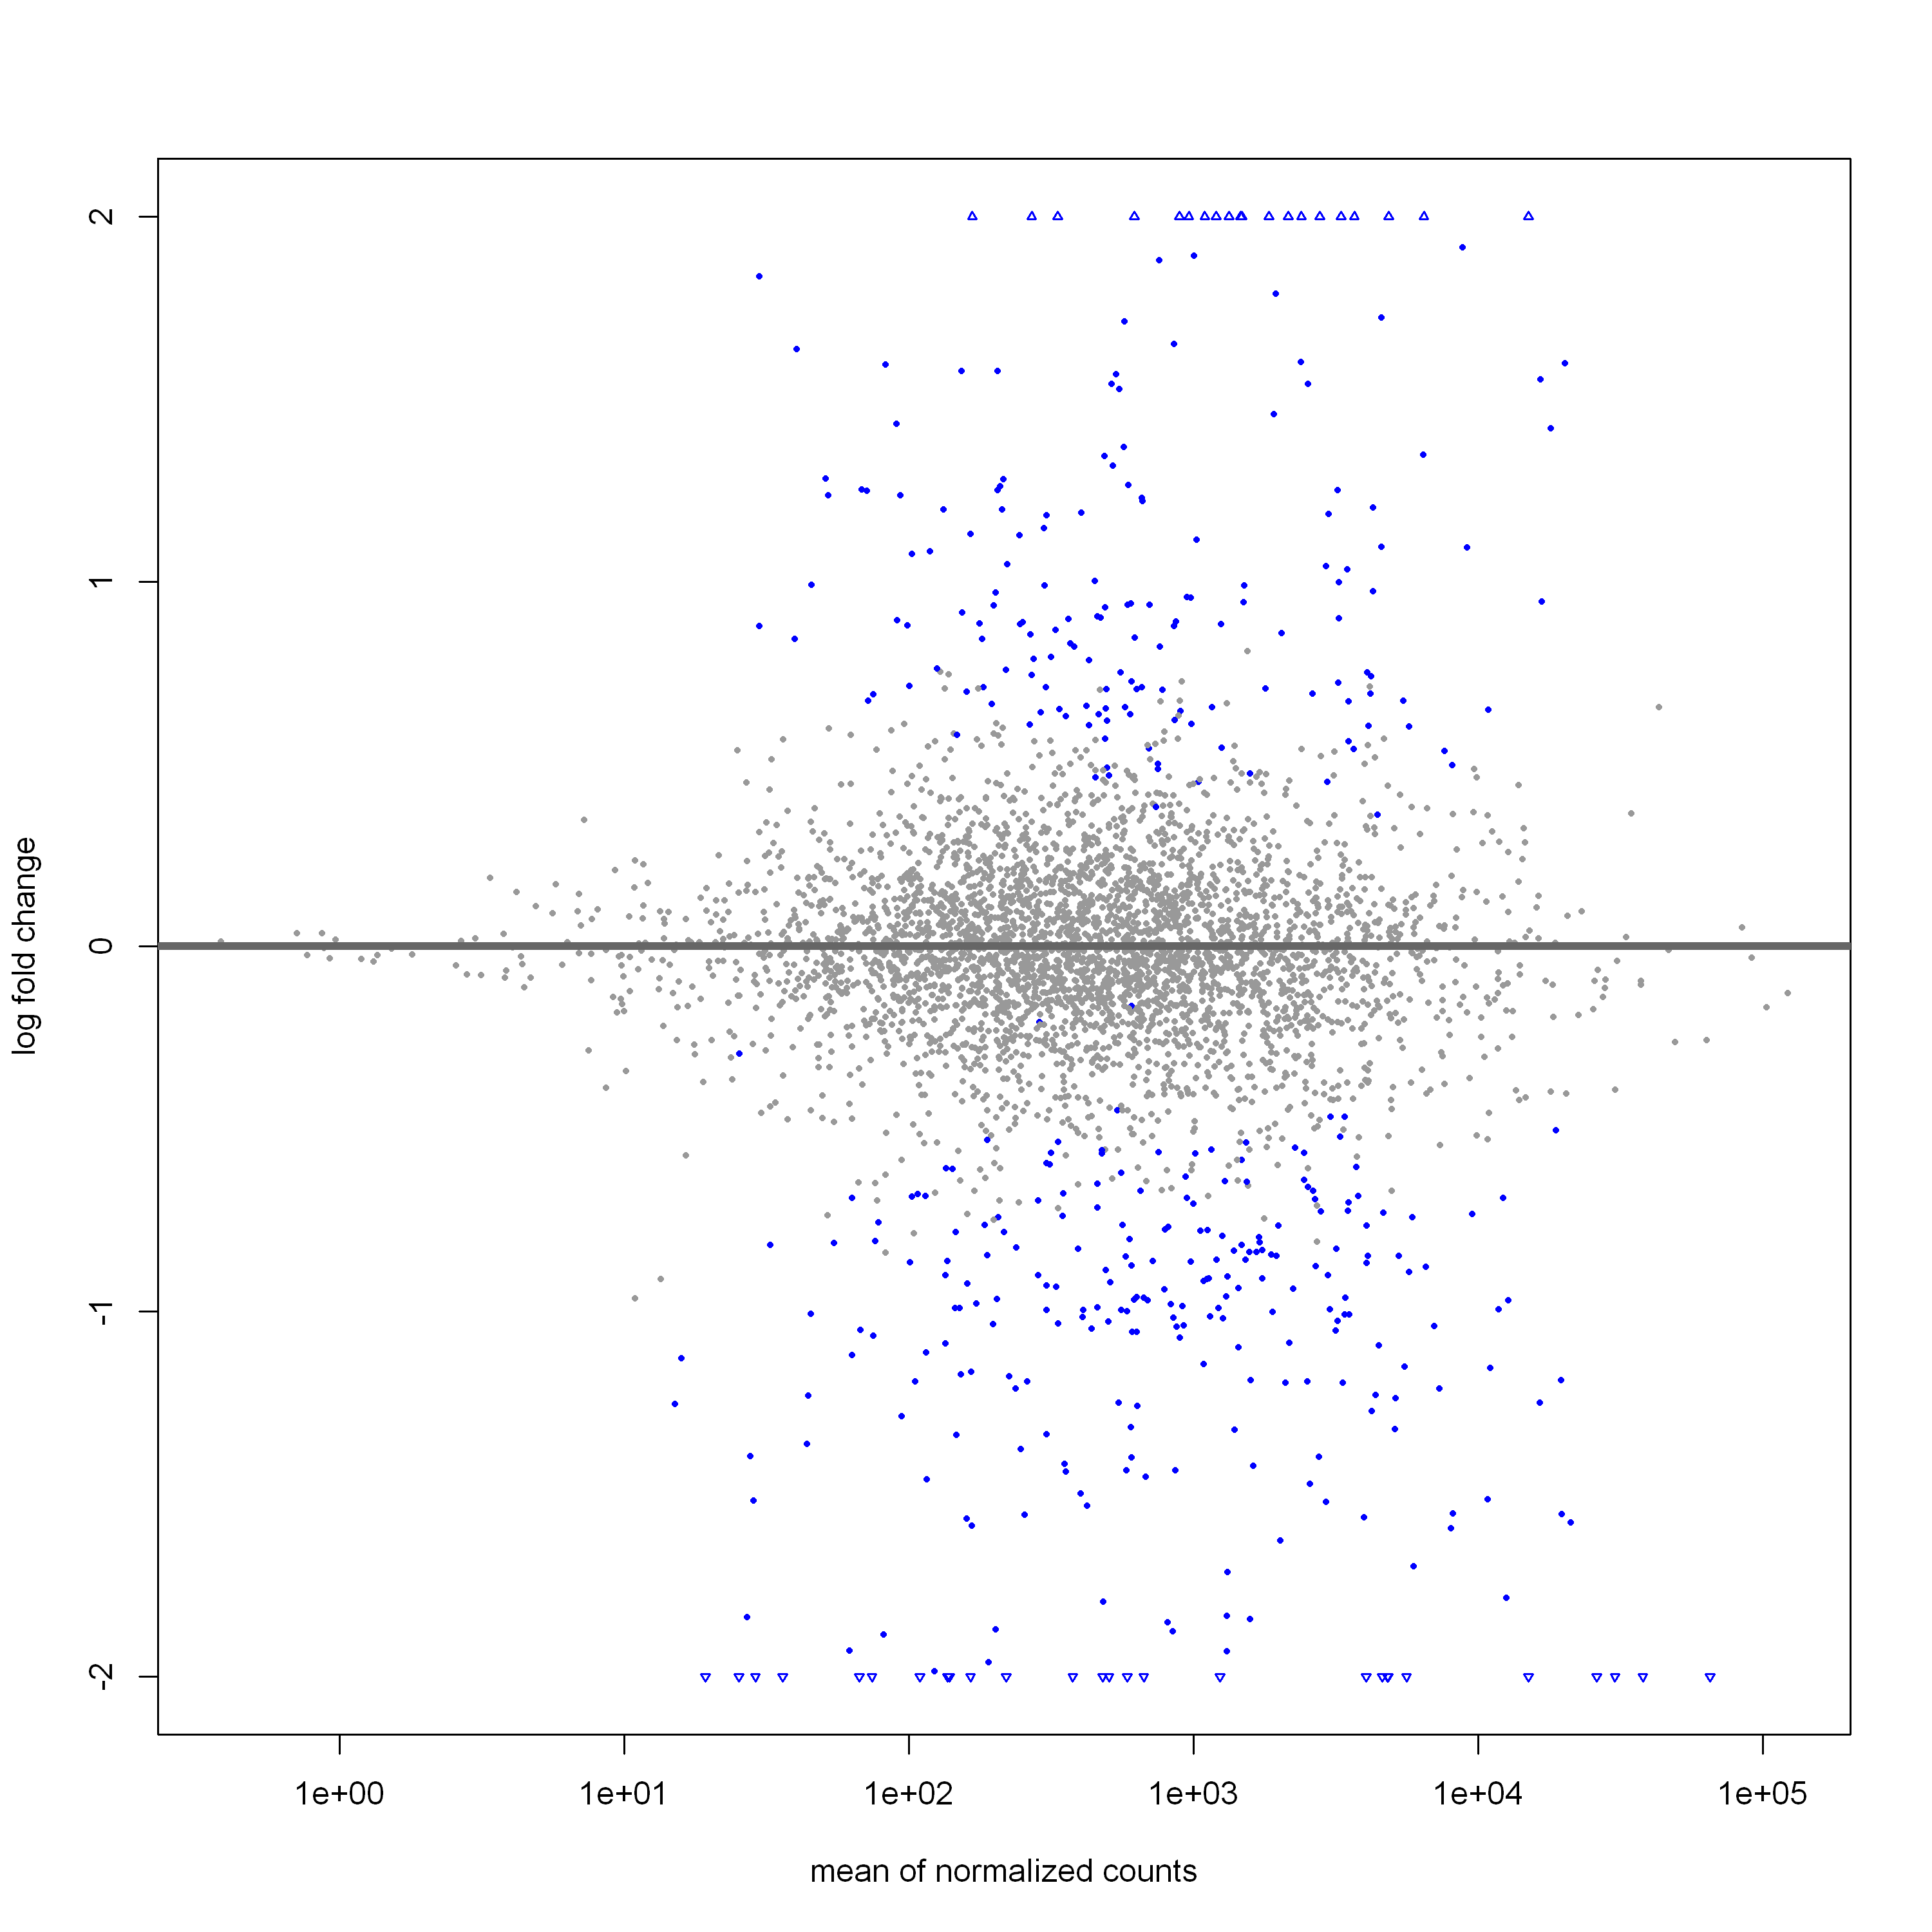

In [76]:
plotMA(resLFC, ylim=c(-2,2))

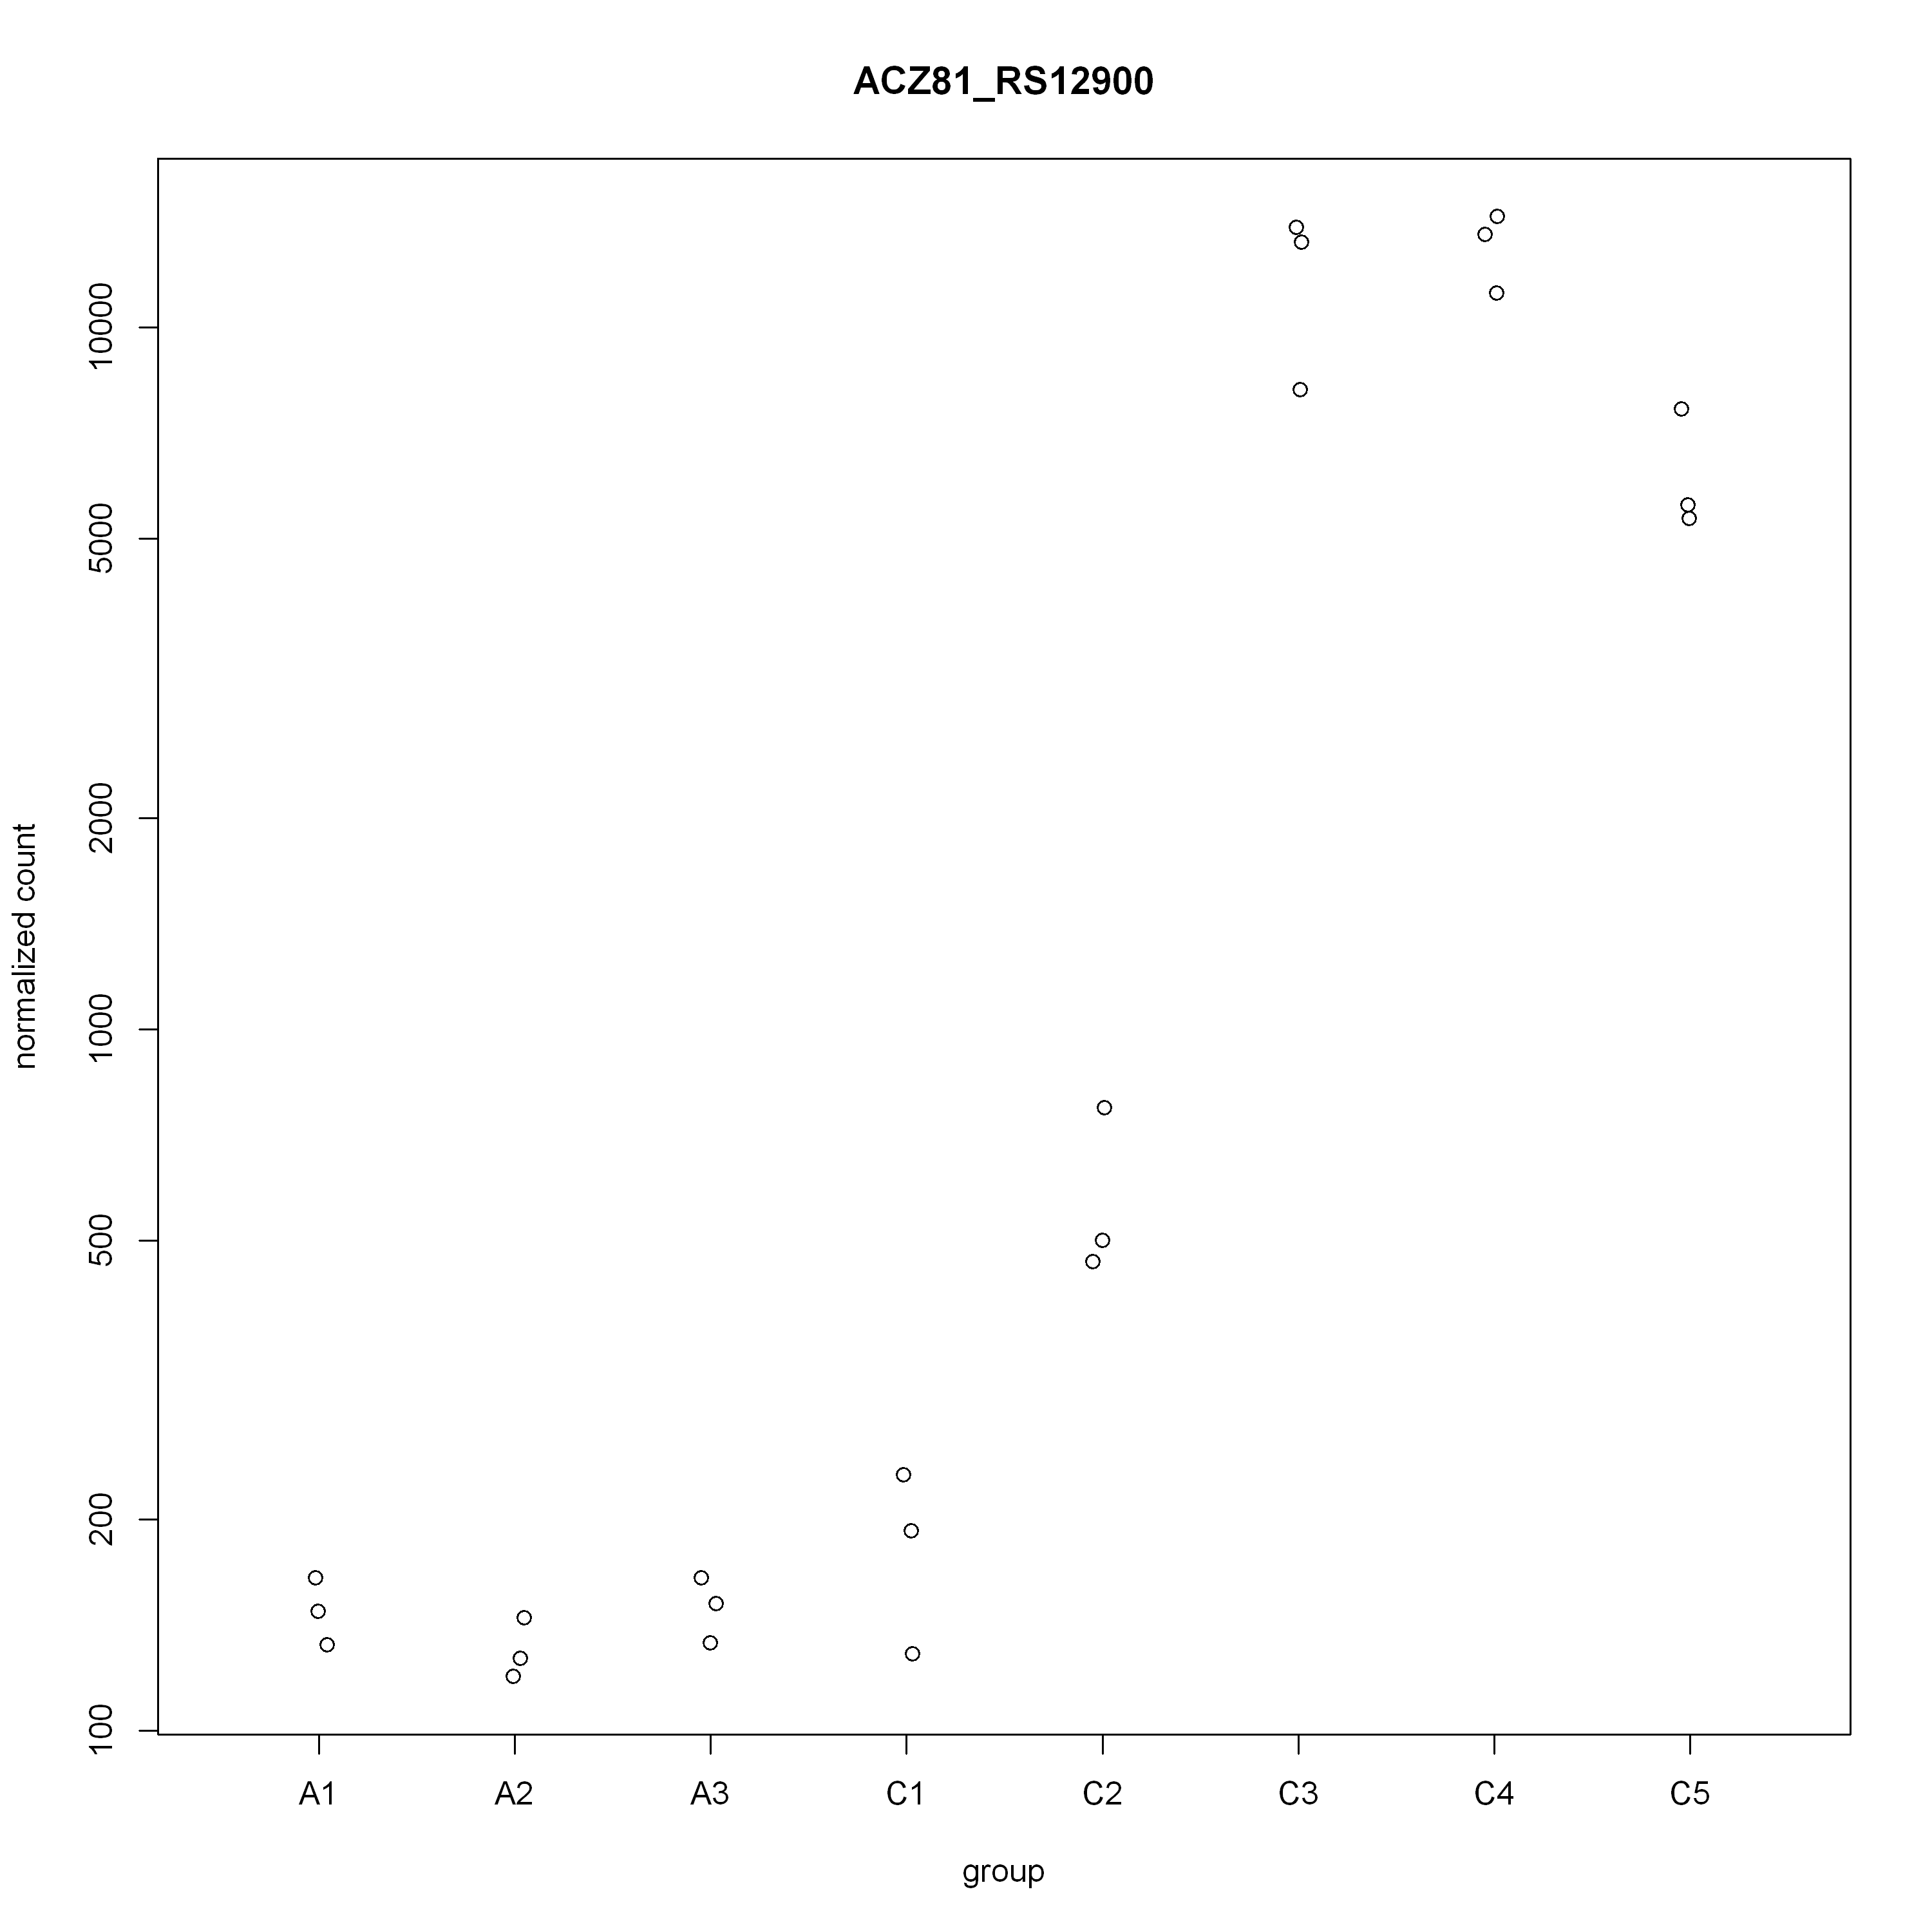

In [77]:
plotCounts(dds, gene=which.min(res$padj), intgroup="groupandtime")

In [78]:
which.min(res$padj)

[1] 2420

In [79]:
genes[349,]

,gene_id,gene,product,protein_id,old_locus_tag
,<chr>,<chr>,<chr>,<chr>,<lgl>
ACZ81_RS01840,ACZ81_RS01840,hemL,"glutamate-1-semialdehyde 2,1-aminomutase",WP_014948008.1,NA


In [80]:
t(counts(dds)[(rowSums(counts(dds) >= 10) < 3),])

,ACZ81_RS00485,ACZ81_RS00815,ACZ81_RS01745,ACZ81_RS04715,ACZ81_RS07560,ACZ81_RS08990,ACZ81_RS09045,ACZ81_RS14035,ACZ81_RS15850,ACZ81_RS16520,ACZ81_RS16985,ACZ81_RS17630,ACZ81_RS17650,ACZ81_RS20125,ACZ81_RS21165,ACZ81_RS21250,ACZ81_RS21415,ACZ81_RS21460,ACZ81_RS21535
A1A,2,8,0,0,3,0,2,1,0,0,0,0,0,2,1,3,1,1,2
A1B,2,0,0,0,0,0,0,2,7,0,5,0,0,0,3,5,2,0,5
A1C,0,0,0,0,2,0,0,4,2,7,0,0,0,2,1,8,0,2,1
A2A,0,0,0,0,0,0,8,0,0,0,0,0,0,0,1,0,0,0,3
A2B,0,1,0,0,0,0,0,2,0,0,0,4,1,6,1,0,0,0,0
A2C,23,2,0,5,0,4,1,0,0,0,3,8,3,17,0,12,0,0,3
A3A,0,0,0,0,0,0,2,0,0,0,0,0,0,6,2,1,0,0,6
A3B,11,10,6,1,3,6,2,1,0,0,0,29,5,13,18,1,4,4,7
A3C,7,0,1,2,0,2,7,7,12,4,0,0,0,0,10,3,10,5,8
C1A,0,0,0,0,0,0,0,4,0,0,6,0,0,0,4,4,0,0,1


In [81]:
genes[(rowSums(counts(dds) >= 10) < 3),]

,gene_id,gene,product,protein_id,old_locus_tag
,<chr>,<chr>,<chr>,<chr>,<lgl>
ACZ81_RS00485,ACZ81_RS00485,thiS,sulfur carrier protein ThiS,WP_014947794.1,NA
ACZ81_RS00815,ACZ81_RS00815,,IS4 family transposase,WP_061439020.1,NA
ACZ81_RS01725,ACZ81_RS01725,,hypothetical protein,WP_014975448.1,NA
ACZ81_RS04640,ACZ81_RS04640,ccmE,cytochrome c maturation protein CcmE,WP_015066378.1,NA
ACZ81_RS07450,ACZ81_RS07450,,dicarboxylate/amino acid:cation symporter,WP_081106073.1,NA
ACZ81_RS08885,ACZ81_RS08885,,YgiQ family radical SAM protein,WP_081106082.1,NA
ACZ81_RS08940,ACZ81_RS08940,,DNA/RNA non-specific endonuclease,WP_061485761.1,NA
ACZ81_RS13830,ACZ81_RS13830,,O-antigen ligase family protein,WP_061486247.1,NA
ACZ81_RS15630,ACZ81_RS15630,lptF,LPS export ABC transporter permease LptF,WP_049588260.1,NA
